In [1]:
import numpy as np
import matplotlib
from matplotlib import colors
import matplotlib.pyplot as plt
import geone
import geone.covModel as gcm
import geone.imgplot3d as imgplt3
import pyvista as pv
import sys
import os

sys.path.append("../../")
#my modules
from ArchPy.base import *
from ArchPy.tpgs import *

In [2]:
#grid
sx = 1.5
sy = 1.5
sz = .15
x0 = 0
y0 = 0
z0 = -15
nx = 140
ny = 70
nz = 70
x1 = x0 + nx*sx
y1 = y0 + ny*sy
z1 = z0 + nz

dimensions = (nx, ny, nz)
spacing = (sx, sy, sz)
origin = (x0, y0, z0)  

In [3]:
## create pile

P1 = Pile(name = "P1",seed=1)

#units covmodel
covmodelD = gcm.CovModel2D(elem=[('cubic', {'w':0.6, 'r':[30,30]})])
covmodelD1 = gcm.CovModel2D(elem=[('cubic', {'w':0.2, 'r':[30,30]})])
covmodelC = gcm.CovModel2D(elem=[('cubic', {'w':0.2, 'r':[40,40]})])
covmodelB = gcm.CovModel2D(elem=[('cubic', {'w':0.6, 'r':[30,30]})])
covmodel_er = gcm.CovModel2D(elem=[('spherical', {'w':1, 'r':[50,50]})])

## facies covmodel
covmodel_SIS_C = gcm.CovModel3D(elem=[("exponential", {"w":.21,"r":[50, 50, 10]})], alpha=0, name="vario_SIS") # input variogram
covmodel_SIS_B1 = gcm.CovModel3D(elem=[("exponential", {"w":.16,"r":[50, 50, 2]})], alpha=0, name="vario_SIS") # input variogram
covmodel_SIS_B2 = gcm.CovModel3D(elem=[("exponential", {"w":.24,"r":[100, 100, 3]})], alpha=0, name="vario_SIS") # input variogram
covmodel_SIS_B3 = gcm.CovModel3D(elem=[("exponential", {"w":.19,"r":[50, 50, 2]})], alpha=0, name="vario_SIS") # input variogram
covmodel_SIS_B4 = gcm.CovModel3D(elem=[("exponential", {"w":.13,"r":[100, 100, 4]})], alpha=0, name="vario_SIS") # input variogram

lst_covmodelC=[covmodel_SIS_C] # list of covmodels to pass at the function
lst_covmodelB=[covmodel_SIS_B1, covmodel_SIS_B2, covmodel_SIS_B3, covmodel_SIS_B4] # list of covmodels to pass


#create Lithologies 
dic_s_D = {"int_method" : "grf_ineq","covmodel" : covmodelD}
dic_f_D = {"f_method":"homogenous"}
D = Unit(name="D",order=1,ID = 1,color="gold",contact="onlap",surface=Surface(contact="onlap",dic_surf=dic_s_D)
         ,dic_facies=dic_f_D)

dic_s_C = {"int_method" : "grf_ineq","covmodel" : covmodelC, "mean":-6.5}
dic_f_C = {"f_method" : "SIS","neig" : 10, "f_covmodel":lst_covmodelC, "probability":[0.3, 0.7]}
C = Unit(name="C", order=2, ID = 2, color="blue", contact="onlap", dic_facies=dic_f_C, surface=Surface(dic_surf=dic_s_C, contact="onlap"))

dic_s_B = {"int_method" : "grf_ineq","covmodel" : covmodelB, "mean":-8.5}
dic_f_B = {"f_method":"SIS", "neig" : 10, "f_covmodel":lst_covmodelB, "probability":[0.2, 0.4, 0.25, 0.15]}
B = Unit(name="B",order=3,ID = 3,color="purple",contact="onlap",dic_facies=dic_f_B,surface=Surface(contact="onlap",dic_surf=dic_s_B))

dic_s_A = {"int_method":"grf_ineq","covmodel": covmodelB, "mean":-11}
dic_f_A = {"f_method":"homogenous"}
A = Unit(name="A",order=5,ID = 5,color="red",contact="onlap",dic_facies=dic_f_A,surface=Surface(dic_surf = dic_s_A,contact="onlap"))

#Master pile
P1.add_unit([D,C,B,A])

Unit D: Surface added for interpolation
Unit C: Surface added for interpolation
Unit B: Surface added for interpolation
Unit A: Surface added for interpolation
Stratigraphic unit D added
Stratigraphic unit C added
Stratigraphic unit B added
Stratigraphic unit A added


In [4]:
# covmodels for the property model
covmodelK = gcm.CovModel3D(elem=[("exponential",{"w":0.3,"r":[30,30,10]})],alpha=-20,name="K_vario")
covmodelK2 = gcm.CovModel3D(elem=[("spherical",{"w":0.1,"r":[20,20, 5]})],alpha=0,name="K_vario_2")

facies_1 = Facies(ID = 1,name="Sand",color="yellow")
facies_2 = Facies(ID = 2,name="Gravel",color="lightgreen")
facies_3 = Facies(ID = 3,name="GM",color="blueviolet")
facies_4 = Facies(ID = 4,name="Clay",color="blue")
facies_5 = Facies(ID = 5,name="SM",color="brown")
facies_6 = Facies(ID = 6,name="Silt",color="goldenrod")
facies_7 = Facies(ID = 7,name="basement",color="red")

A.add_facies([facies_7])
B.add_facies([facies_1, facies_2, facies_3, facies_5])
D.add_facies([facies_1])
C.add_facies([facies_4, facies_6])

# property model
cm_prop1 = gcm.CovModel3D(elem = [("spherical", {"w":0.1, "r":[10,10,10]}),
                                  ("cubic", {"w":0.1, "r":[15,15,15]})])
cm_prop2 = gcm.CovModel3D(elem = [("cubic", {"w":0.2, "r":[25, 25, 5]})])

list_facies = [facies_1, facies_2, facies_3, facies_4, facies_5, facies_6, facies_7]
list_covmodels = [cm_prop2, cm_prop1, cm_prop2, cm_prop1, cm_prop2, cm_prop1, cm_prop2]
means = [-4, -2, -6, -9, -6, -7, -19]
prop_model = ArchPy.base.Prop("K",
                              facies = list_facies,
                              covmodels = list_covmodels,
                                means = means,
                                int_method = "sgs",
                                vmin = -10,
                                vmax = -1
                                )



Facies basement added to unit A
Facies Sand added to unit B
Facies Gravel added to unit B
Facies GM added to unit B
Facies SM added to unit B
Facies Sand added to unit D
Facies Clay added to unit C
Facies Silt added to unit C


In [5]:
top = np.ones([ny,nx])*-6
bot = np.ones([ny,nx])*z0

In [6]:
T1 = Arch_table(name = "P1",seed=3)
T1.set_Pile_master(P1)
T1.add_grid(dimensions, spacing, origin, top=top,bot=bot)
T1.add_prop(prop_model)

Pile sets as Pile master
## Adding Grid ##
## Grid added and is now simulation grid ##
Property K added


In [7]:
T1.compute_surf(3)
T1.compute_facies(2)
T1.compute_prop(1)

Boreholes not processed, fully unconditional simulations will be tempted
########## PILE P1 ##########
Pile P1: ordering units
Stratigraphic units have been sorted according to order
Discrepency in the orders for units A and B
Changing orders for that they range from 1 to n

#### COMPUTING SURFACE OF UNIT A
A: time elapsed for computing surface 0.038033246994018555 s

#### COMPUTING SURFACE OF UNIT B
B: time elapsed for computing surface 0.031028032302856445 s

#### COMPUTING SURFACE OF UNIT C
C: time elapsed for computing surface 0.03234529495239258 s

#### COMPUTING SURFACE OF UNIT D
D: time elapsed for computing surface 0.0 s

Time elapsed for getting domains 0.051046133041381836 s

#### COMPUTING SURFACE OF UNIT A
A: time elapsed for computing surface 0.031028270721435547 s

#### COMPUTING SURFACE OF UNIT B
B: time elapsed for computing surface 0.031028032302856445 s

#### COMPUTING SURFACE OF UNIT C
C: time elapsed for computing surface 0.032028913497924805 s

#### COMPUTING SURFA

In [8]:
import flopy as fp

In [9]:
pv.set_jupyter_backend("client")

In [10]:
T1.plot_units(v_ex=3)

Widget(value="<iframe src='http://localhost:53408/index.html?ui=P_0x1f9da9c6890_0&reconnect=auto' style='width…

In [11]:
T1.plot_facies(v_ex=3)

Widget(value="<iframe src='http://localhost:53408/index.html?ui=P_0x1f9d7db5f10_1&reconnect=auto' style='width…

In [12]:
T1.plot_prop("K", v_ex=3)

Widget(value="<iframe src='http://localhost:53408/index.html?ui=P_0x1f9da4109d0_2&reconnect=auto' style='width…

In [13]:
val = T1.get_prop("K")[0, 0, 0]
im = geone.img.Img(nx=nx, ny=ny, nz=nz, sx=sx, sy=sy, sz=sz, ox=x0, oy=y0, oz=z0, nv=1, val=val)

In [14]:

factor_x = 4
factor_y = 2
factor_z = 2

nlay, nrow, ncol = T1.get_nz(), T1.get_ny(), T1.get_nx()
delr, delc = T1.get_sx(), T1.get_sy()
xoff, yoff = T1.get_ox(), T1.get_oy()

assert factor_x is not None, "factor_x must be provided"
assert factor_y is not None, "factor_y must be provided"
assert factor_z is not None, "factor_z must be provided"
assert nrow % factor_y == 0, "nrow must be divisible by factor_y"
assert ncol % factor_x == 0, "ncol must be divisible by factor_x"
assert nlay % factor_z == 0, "nlay must be divisible by factor_z"
nrow = int(nrow / factor_y)
ncol = int(ncol / factor_x)
nlay = int(nlay / factor_z)
delr = delr * factor_x
delc = delc * factor_y
top = np.ones((nrow, ncol)) * T1.get_zg()[-1]
botm = np.ones((nlay, nrow, ncol)) * T1.get_zg()[::-factor_z][1:].reshape(-1, 1, 1)
botm = np.flip(np.flipud(botm), axis=1)  # flip the array to have the same orientation as the ArchPy table
botm.shape

(35, 35, 35)

In [15]:
delc, delr

(3.0, 6.0)

## archpy2modflow

Here is a simple example of how to use the `archpy2modflow` package to convert an ArchPy model to a MODFLOW model using the `flopy` package.
Several modes can be used to convert the ArchPy model to a MODFLOW model. The modes are:
- `archpy` mode: This mode uses the ArchPy model to create a MODFLOW model. The ArchPy model is used to create the MODFLOW model grid, boundary conditions, and initial conditions.
- `layers` mode: This mode considers that each stratigraphic unit is a modflow layer and uses the surfaces simulated by ArchPy to define the bottom elevation of each layer. K values are averaged between the top and bottom of each layer.
- `new_resolution` mode: upscaled model using the uppy package. New resolution is defined as a factor of reduction in each direction. For example, if the factor in x direction is 2, the new model will have half the number of cells in the x direction, while the number of cells in the y and z directions will remain the same.

### archpy mode

In [19]:
import ap_mf
from ap_mf import archpy2modflow, array2cellids

Let us create our modflow model. 

#### modflow model

In [33]:
archpy_flow = archpy2modflow(T1, exe_name="../../../../exe/mf6.exe")  # create the modflow model
archpy_flow.create_sim(grid_mode="archpy", iu=0)  # create the simulation object and choose a certain discretization
archpy_flow.set_k("K", iu=0, ifa=0, ip=0, log=True)  # set the hydraulic conductivity

Simulation created
To retrieve the simulation, use the get_sim() method


Here we have instantiate a modflow model based on the ArchPy model and using the same grid resolution. The model is created using the `archpy` mode.
We have also set the npf package to use the K values from the ArchPy model. As ArchPy is a stochastic model we have multiple realization, here it is the one that corresponds to iu=0, ifa=0 and ip=0.
We also indicate that K values are in log10 scale.

Now we can retrieve flopy/modflow model and add different packages as we would do with a regular modflow model.

In [34]:
sim = archpy_flow.get_sim()
gwf = archpy_flow.get_gwf()

For example some boundary conditions

In [35]:
# add BC at left and right on all layers
h1 = 100
h2 = 0
chd_data = []

a = np.zeros((gwf.modelgrid.nlay, gwf.modelgrid.nrow, gwf.modelgrid.ncol), dtype=bool)
a[:, :, 0] = 1
lst_chd = array2cellids(a, gwf.dis.idomain.array)
for cellid in lst_chd:
    chd_data.append((cellid, h1))

a = np.zeros((gwf.modelgrid.nlay, gwf.modelgrid.nrow, gwf.modelgrid.ncol), dtype=bool)
a[:, :, -1] = 1
lst_chd = array2cellids(a, gwf.dis.idomain.array)
for cellid in lst_chd:
    chd_data.append((cellid, h2))

chd = fp.mf6.ModflowGwfchd(gwf, stress_period_data=chd_data, save_flows=True)

 Write modflow model files

In [36]:
sim.write_simulation()

writing simulation...
  writing simulation name file...
  writing simulation tdis package...
  writing solution package ims_-1...
  writing model test...
    writing model name file...
    writing package dis...
    writing package ic...
    writing package oc...
    writing package npf...
    writing package chd_0...
INFORMATION: maxbound in ('gwf6', 'chd', 'dimensions') changed to 8400 based on size of stress_period_data


Here we also modify the solver to an higher complexity as the model contains a large number of cells and have difficult to converge.

In [37]:
sim.ims.complexity = "complex"
sim.ims.write()

In [38]:
sim.run_simulation()

FloPy is using the following executable to run the model: ..\..\..\..\..\exe\mf6.exe
                                   MODFLOW 6
                U.S. GEOLOGICAL SURVEY MODULAR HYDROLOGIC MODEL
                            VERSION 6.5.0 05/23/2024

   MODFLOW 6 compiled Jun 21 2024 02:57:23 with Intel(R) Fortran Intel(R) 64
   Compiler Classic for applications running on Intel(R) 64, Version 2021.7.0
                             Build 20220726_000000

This software has been approved for release by the U.S. Geological 
Survey (USGS). Although the software has been subjected to rigorous 
review, the USGS reserves the right to update the software as needed 
pursuant to further analysis and review. No warranty, expressed or 
implied, is made by the USGS or the U.S. Government as to the 
functionality of the software and related material nor shall the 
fact of release constitute any such warranty. Furthermore, the 
software is released on condition that neither the USGS nor the U.S. 
Governm

(True, [])

Now we can retrieve some results. Archpy2modflow objects integrate some basic functions to facilitate this such as ``get_heads`` methods.

In [44]:
heads = archpy_flow.get_heads(kstpkper=(0, 0))
heads[heads == 1e30] = np.nan

In [45]:
cobj = gwf.output.budget()
qx, qy, qz = fp.utils.postprocessing.get_specific_discharge(
        cobj.get_data(text="DATA-SPDIS", kstpkper=(0, 0))[0], gwf)

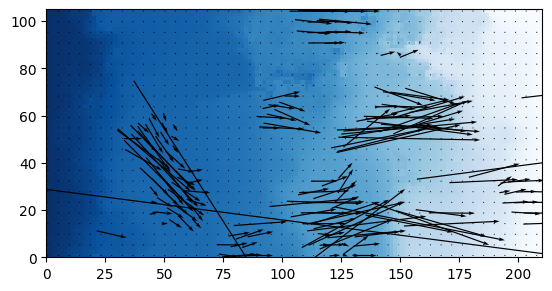

In [46]:
from flopy.plot import PlotMapView
mapview = PlotMapView(model=gwf, layer=15)
quadmesh = mapview.plot_array(heads, cmap="Blues")
# quadmesh = mapview.contour_array(heads, cmap="jet", levels=10)
# quadmesh = mapview.plot_array(np.log10(gwf.npf.k.array), cmap="viridis")
mapview.plot_vector(qx, qy, color="black", istep=3, jstep=3)

Be aware that grids between modflow and archpy are not the same. The origin of the grid is at the lowest layer, left and bottom of the model in archpy and at the uppest layer, left and top of the model in modflow (see the figure)

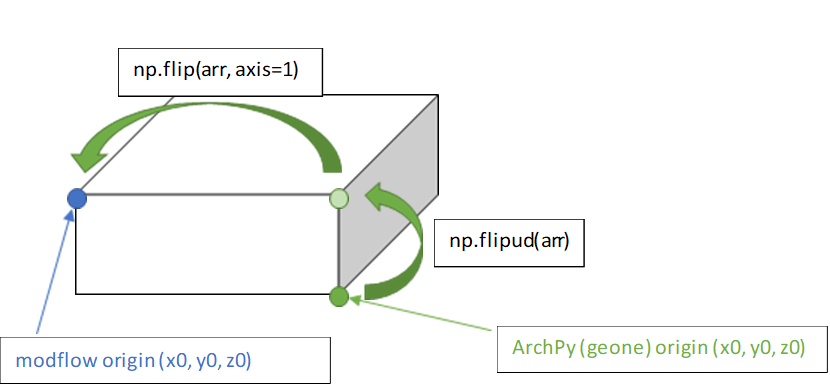
    

If you have a modflow output and want to plot it in 3D using archpy, you need to flip this array using the following command:

```python
heads = np.flipud(np.flip(heads, axis=1))
```

In [47]:
heads = archpy_flow.get_heads()
heads[heads == 1e30] = np.nan

T1.plot_arr(np.flipud(np.flip(heads, axis=1)), "head", 2)

Widget(value="<iframe src='http://localhost:53408/index.html?ui=P_0x1f9e4908190_5&reconnect=auto' style='width…

In [43]:
T1.plot_prop("K", v_ex=2)

Widget(value="<iframe src='http://localhost:53408/index.html?ui=P_0x1f9dc96ce50_4&reconnect=auto' style='width…

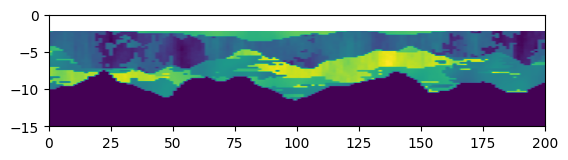

In [244]:
plt.imshow(np.fliplr(T1.get_prop("K")[0, 0, 0, :, -1, :]), aspect=3, origin="lower", extent=[0, 200, -15, 0])

#### Modpath simulations

archpy2modflow also integrates function to run modpath simulations. Here is an example of how to run a modpath simulation. Note that it only works with modpath 7.

First we need to create a modpath model and provide the path to the modpath executable. This is done using ``mp_create`` method as shown below

Initial starting point of particles can be either defined by a list of coordinates or by a list of cell indices. Here we use the first option and we provide a list to ``list_p_coord``. The tracking direction is also defined by the user. Here we use the backward tracking direction.

In [50]:
mpexe_path = "C:/Users/emmal/switchdrive2/Post_doc/prog/exe/modflow_exe/win64/mp7.exe"
# mpexe_path = "E:/switchdrive/Post_doc/prog/exe/modflow_exe/win64/mp7.exe"
# mpexe_path = "C:/Users/Ludovic/switchdrive/Post_doc/prog/exe/modflow_exe/win64/mp7.exe"
archpy_flow.mp_create(mpexe=mpexe_path, 
                      trackdir="backward", 
                      list_p_coord=[(170.7, 99.75, -7), (170.7, 99.75, -9), (170.7, 99.75, -11)])

In [51]:
archpy_flow.mp_run(silent=False)

FloPy is using the following executable to run the model: ..\..\..\..\..\..\switchdrive2\Post_doc\prog\exe\modflow_exe\win64\mp7.exe

MODPATH Version 7.2.001   
Program compiled Jun 21 2024 03:01:44 with IFORT compiler (ver. 20.21.7)        
 
 
Run particle tracking simulation ...
Processing Time Step     1 Period     1.  Time =  1.00000E+00  Steady-state flow                                                    

Particle Summary:
         0 particles are pending release.
         0 particles remain active.
         0 particles terminated at boundary faces.
         0 particles terminated at weak sink cells.
         0 particles terminated at weak source cells.
         3 particles terminated at strong source/sink cells.
         0 particles terminated in cells with a specified zone number.
         0 particles were stranded in inactive or dry cells.
         0 particles were unreleased.
         0 particles have an unknown status.
 
Normal termination.                                 

Pathlines and endpoints objects can be retrieve using archpy2modflow functions

In [52]:
p = archpy_flow.mp_get_pathlines_object()
e = archpy_flow.mp_get_endpoints_object()

<Figure size 1000x1000 with 0 Axes>

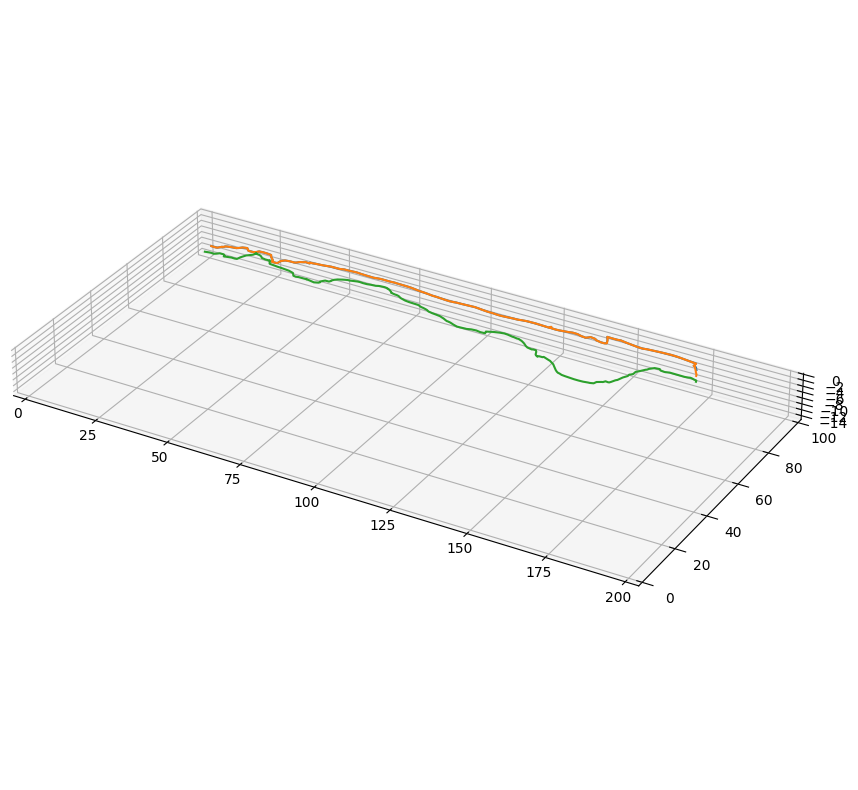

In [71]:
fig = plt.figure(figsize=(10, 10))
path = p.get_alldata()

# 3D plot of the pathlines
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection="3d")

for pth in path:
    ax.plot(pth["x"], pth["y"], pth["z"])

plt.xlim(0, 200)
plt.ylim(0, 100)
ax.set_zlim(-15, 0)
ax.set_aspect("equal")
plt.show()

In [68]:
T1.plot_facies(inside_units=[C], v_ex=1, excludedVal=[])

Widget(value="<iframe src='http://localhost:53408/index.html?ui=P_0x1f989cb1590_6&reconnect=auto' style='width…

In [293]:
print(p.get_alldata()[0][["x", "y", "z"]][0], p.get_alldata()[1][["x", "y", "z"]][0], p.get_alldata()[2][["x", "y", "z"]][0])

(170.7, 99.75, -7.) (170.7, 99.75, -9.) (170.7, 99.75, -11.)


In [294]:
import pandas as pd

In [317]:
df = pd.DataFrame(p.get_alldata()[1])
cells_path = np.array((((df["z"].values-T1.zg[0])//T1.sz).astype(int), ((df["y"].values-T1.yg[0])//T1.sy).astype(int), ((df["x"].values-T1.xg[0])//T1.sx).astype(int))).T

In [318]:
pd.to_timedelta(df["time"], unit="s")

0               0 days 00:00:00
1        0 days 00:00:00.010000
2        0 days 00:00:00.020000
3     0 days 00:00:00.029999999
4     0 days 00:00:00.039999999
                 ...           
315          1217 days 01:45:12
316          1217 days 01:46:48
317          1217 days 01:48:00
318          1217 days 01:51:20
319          1217 days 01:51:20
Name: time, Length: 320, dtype: timedelta64[ns]

In [319]:
# keep unique cells in the path but keep the order
unique_cells = np.unique(cells_path, axis=0)
_, idx = np.unique(cells_path, axis=0, return_index=True)
unique_cells_ordered = cells_path
time_ordered = df["time"].values
time_ordered /= 86400
df = df

In [320]:
df

,particleid,particlegroup,sequencenumber,particleidloc,time,x,y,z,k,node,xloc,yloc,zloc,stressperiod,timestep
0,1,1,1,0,0.000000e+00,170.699997,99.750000,-9.000000,29,284733,0.800000,0.500000,0.000102,1,1
1,1,1,1,0,1.157407e-07,170.699997,99.750000,-9.000000,29,284733,0.800000,0.500000,0.000102,1,1
2,1,1,1,0,2.314815e-07,170.699997,99.750000,-9.000000,29,284733,0.800000,0.500000,0.000102,1,1
3,1,1,1,0,3.472222e-07,170.699997,99.750000,-9.000000,29,284733,0.800000,0.500000,0.000102,1,1
4,1,1,1,0,4.629630e-07,170.699997,99.750000,-9.000000,29,284733,0.800000,0.500000,0.000102,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
315,1,1,1,0,1.217073e+03,3.689804,99.000000,-10.236268,38,372822,0.459869,0.000000,0.758294,1,1
316,1,1,1,0,1.217074e+03,3.558200,98.857933,-10.200012,38,372962,0.372133,0.905288,1.000000,1,1
317,1,1,1,0,1.217075e+03,3.000000,98.754059,-10.172407,37,363162,0.000000,0.836038,0.184033,1,1
318,1,1,1,0,1.217077e+03,1.500000,98.793182,-10.153807,37,363160,1.000000,0.862119,0.308035,1,1


In [321]:
# add a column to track distance traveled
df["distance"] = 0
for i in range(1, df.shape[0]):
    x0, y0, z0 = df[["x", "y", "z"]].iloc[i-1]
    x1, y1, z1 = df[["x", "y", "z"]].iloc[i]
    distance = np.sqrt((x1-x0)**2 + (y1-y0)**2 + (z1-z0)**2)
    df.loc[df.index[i], "distance"] = distance

df["cum_distance"] = df["distance"].cumsum()

In [322]:
df

,particleid,particlegroup,sequencenumber,particleidloc,time,x,y,z,k,node,xloc,yloc,zloc,stressperiod,timestep,distance,cum_distance
0,1,1,1,0,0.000000e+00,170.699997,99.750000,-9.000000,29,284733,0.800000,0.500000,0.000102,1,1,0.000000,0.000000
1,1,1,1,0,1.157407e-07,170.699997,99.750000,-9.000000,29,284733,0.800000,0.500000,0.000102,1,1,0.000000,0.000000
2,1,1,1,0,2.314815e-07,170.699997,99.750000,-9.000000,29,284733,0.800000,0.500000,0.000102,1,1,0.000000,0.000000
3,1,1,1,0,3.472222e-07,170.699997,99.750000,-9.000000,29,284733,0.800000,0.500000,0.000102,1,1,0.000000,0.000000
4,1,1,1,0,4.629630e-07,170.699997,99.750000,-9.000000,29,284733,0.800000,0.500000,0.000102,1,1,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
315,1,1,1,0,1.217073e+03,3.689804,99.000000,-10.236268,38,372822,0.459869,0.000000,0.758294,1,1,1.408443,184.021803
316,1,1,1,0,1.217074e+03,3.558200,98.857933,-10.200012,38,372962,0.372133,0.905288,1.000000,1,1,0.197021,184.218824
317,1,1,1,0,1.217075e+03,3.000000,98.754059,-10.172407,37,363162,0.000000,0.836038,0.184033,1,1,0.568453,184.787277
318,1,1,1,0,1.217077e+03,1.500000,98.793182,-10.153807,37,363160,1.000000,0.862119,0.308035,1,1,1.500625,186.287903


In [323]:
# retrieve lithologies along the pathlines
facies_domains = T1.get_facies(0, 0, all_data = False)
facies_along_path = facies_domains[unique_cells_ordered[:, 0], unique_cells_ordered[:, 1], unique_cells_ordered[:, 2]]

In [324]:
facies_along_path

array([6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 5, 5, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

In [325]:
dt = np.diff(time_ordered)
dt

array([1.15740740e-07, 1.15740740e-07, 1.15740747e-07, 1.15740733e-07,
       1.15740733e-07, 1.15740761e-07, 1.15740761e-07, 1.15740704e-07,
       1.15740761e-07, 1.15740704e-07, 1.15740704e-07, 1.15740818e-07,
       1.15740704e-07, 1.15740818e-07, 1.15740704e-07, 1.15740704e-07,
       1.15740818e-07, 1.15740704e-07, 1.15740704e-07, 1.15740704e-07,
       1.15740704e-07, 1.15740704e-07, 1.15740932e-07, 1.15740704e-07,
       1.15740704e-07, 1.15740704e-07, 1.15740932e-07, 1.15740704e-07,
       1.15740477e-07, 1.15740932e-07, 1.15740704e-07, 1.15740704e-07,
       1.15740704e-07, 1.15740932e-07, 1.15740477e-07, 1.15740932e-07,
       1.15740932e-07, 1.15740477e-07, 1.15740477e-07, 1.15740932e-07,
       1.15740932e-07, 1.15740477e-07, 1.15740932e-07, 1.15740477e-07,
       1.15740932e-07, 1.15740932e-07, 1.15740477e-07, 1.15740932e-07,
       1.15740932e-07, 1.15740477e-07, 1.15740477e-07, 1.15740932e-07,
       1.15740477e-07, 1.15741386e-07, 1.15740477e-07, 1.15740932e-07,
      

[]

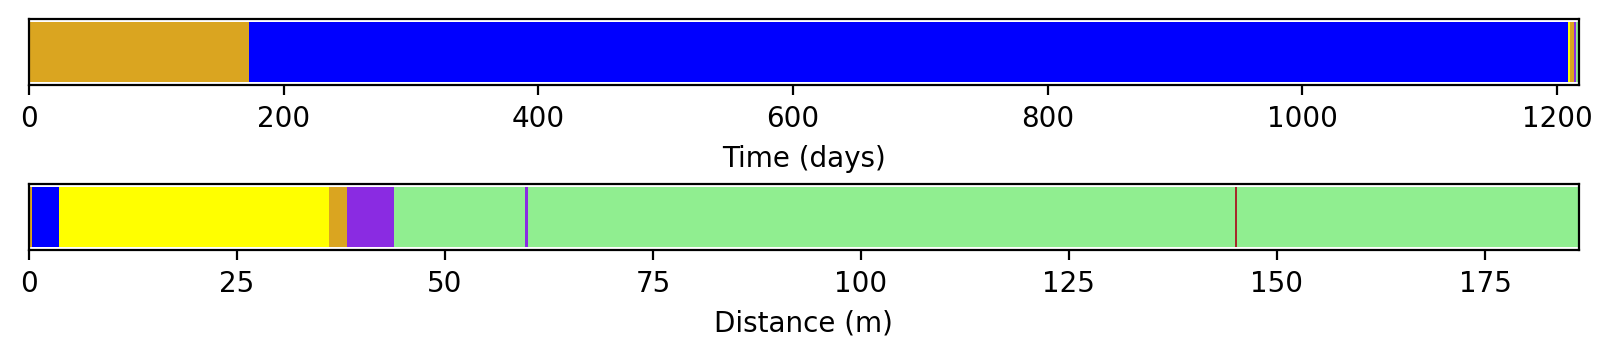

In [328]:
%matplotlib inline
# plot facies along the pathlines as a horizontal bar plot where each color corresponds to a facies
fig, ax = plt.subplots(2,1, figsize=(10, 1.5), dpi=200)
plt.subplots_adjust(hspace=1.5)

for i, (facies, time) in enumerate(zip(facies_along_path, time_ordered)):

    if i >= len(dt):
        break
    ax[0].barh(0, dt[i], left=time, color=T1.get_facies_obj(ID=facies, type="ID").c)


ax[0].set_xlim(0, time_ordered[-1])
ax[0].set_xlabel("Time (days)")
ax[0].set_yticks([])

# plot facies function of the distance traveled
all_dist = df["distance"].values
all_cum_dist = df["cum_distance"].values

for i in range(int(len(facies_along_path) - 1)):
    facies = facies_along_path[i]
    width = all_dist[i+1]
    distance = all_cum_dist[i]
    ax[1].barh(0, width, left=distance, color=T1.get_facies_obj(ID=facies, type="ID").c)


ax[1].set_xlim(0, all_cum_dist[-1])
ax[1].set_xlabel("Distance (m)")
ax[1].set_yticks([])
    

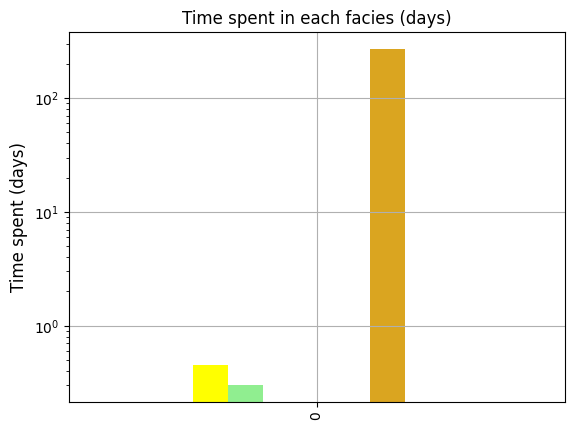

In [99]:
fig, ax = plt.subplots()

df_time = pd.DataFrame(columns=[fa.name for fa in list_facies])
# initialize the time spent in each facies
time_spent = np.zeros(len(list_facies))
for i, fa in enumerate(list_facies):
    time_spent[i] = 0
df_time.loc[0] = time_spent

for i in range(len(time_ordered)-1):
    dt = time_ordered[i+1] - time_ordered[i]
    for j, fa in enumerate(list_facies):
        if facies_along_path[i] == fa.ID:
            time_spent[j] += dt

color_facies = [fa.c for fa in list_facies]

df_time.plot(kind="bar", color=color_facies, legend=False, logy=True, ax=ax)
ax.set_title("Time spent in each facies (days)")
ax.set_ylabel("Time spent (days)", fontsize=12)
plt.grid()
plt.show()

In [100]:
# l_df = []
# for iu in range(3):
#     for ifa in range(2):
#         # set hydraulic cond
#         archpy_flow.set_k(k_key = "K", 
#                         iu=iu, ifa=ifa, ip=0, 
#                         log=True)

#         # run simulation
#         sim.run_simulation()

#         # setup modpath
#         mpexe_path = "E:/switchdrive/Post_doc/prog/exe/modflow_exe/win64/mp7.exe"
#         archpy_flow.mp_create(mpexe=mpexe_path, 
#                             trackdir="backward", 
#                             list_p_coord=[(70.7, 99.75, -10)])
#         archpy_flow.mp_run(silent=False)

#         p = archpy_flow.mp_get_pathlines_object()
#         df = pd.DataFrame(p.get_alldata()[0])
#         cells_path = np.array((((df["z"].values-T1.zg[0])//T1.sz).astype(int), ((df["y"].values-T1.yg[0])//T1.sy).astype(int), ((df["x"].values-T1.xg[0])//T1.sx).astype(int))).T

#         unique_cells_ordered = cells_path
#         time_ordered = df["time"].values
#         time_ordered /= 86400

#         # add a column to track distance traveled
#         df["distance"] = 0
#         for i in range(1, df.shape[0]):
#             x0, y0, z0 = df[["x", "y", "z"]].iloc[i-1]
#             x1, y1, z1 = df[["x", "y", "z"]].iloc[i]
#             distance = np.sqrt((x1-x0)**2 + (y1-y0)**2 + (z1-z0)**2)
#             df.loc[df.index[i], "distance"] = distance

#         df["cum_distance"] = df["distance"].cumsum()


#         # retrieve lithologies along the pathlines
#         facies_domains = T1.get_facies(iu, ifa, all_data = False)
#         facies_along_path = facies_domains[unique_cells_ordered[:, 0], unique_cells_ordered[:, 1], unique_cells_ordered[:, 2]]

#         dt = np.diff(time_ordered)

#         # store everything in a new dataframe
#         df_all = pd.DataFrame(columns=["dt", "time", "distance", "cum_distance", "facies"])
#         df_all["dt"] = dt
#         df_all["time"] = time_ordered[:-1]
#         df_all["distance"] = df["distance"].values[:-1]
#         df_all["cum_distance"] = df["cum_distance"].values[:-1]
#         df_all["facies"] = facies_along_path[:-1]

#         l_df.append(df_all)

In [ ]:
# for i in range(6):
#     plot_particle_tracking(T1, l_df[i], plot_time=True)

NameError: name 'l_df' is not defined

### Layers mode

In [19]:
archpy_flow = archpy2modflow(T1, exe_name="../../../../exe/mf6.exe")
archpy_flow.create_sim(grid_mode="layers", iu=0)
archpy_flow.set_k(k_key="K", iu=0, ifa=0, ip=0, log=True, k_average_method="anisotropic")

Simulation created
To retrieve the simulation, use the get_sim() method


In [20]:
sim = archpy_flow.get_sim()
gwf = archpy_flow.get_gwf()

In [21]:
# add BC at left and right on all layers
h1 = 100
h2 = 0
chd_data = []

a = np.zeros((gwf.modelgrid.nlay, gwf.modelgrid.nrow, gwf.modelgrid.ncol), dtype=bool)
a[:, :, 0] = 1
lst_chd = array2cellids(a, gwf.dis.idomain.array)
for cellid in lst_chd:
    chd_data.append((cellid, h1))

a = np.zeros((gwf.modelgrid.nlay, gwf.modelgrid.nrow, gwf.modelgrid.ncol), dtype=bool)
a[:, :, -1] = 1
lst_chd = array2cellids(a, gwf.dis.idomain.array)
for cellid in lst_chd:
    chd_data.append((cellid, h2))

chd = fp.mf6.ModflowGwfchd(gwf, stress_period_data=chd_data, save_flows=True)
    

In [22]:
sim.write_simulation()
sim.ims.complexity = "moderate"
sim.ims.write()
sim.run_simulation()

writing simulation...
  writing simulation name file...
  writing simulation tdis package...
  writing solution package ims_-1...
  writing model test...
    writing model name file...
    writing package dis...
    writing package ic...
    writing package oc...
    writing package npf...
    writing package chd_0...
INFORMATION: maxbound in ('gwf6', 'chd', 'dimensions') changed to 536 based on size of stress_period_data
FloPy is using the following executable to run the model: ..\..\..\..\..\exe\mf6.exe
                                   MODFLOW 6
                U.S. GEOLOGICAL SURVEY MODULAR HYDROLOGIC MODEL
                            VERSION 6.5.0 05/23/2024

   MODFLOW 6 compiled Jun 21 2024 02:57:23 with Intel(R) Fortran Intel(R) 64
   Compiler Classic for applications running on Intel(R) 64, Version 2021.7.0
                             Build 20220726_000000

This software has been approved for release by the U.S. Geological 
Survey (USGS). Although the software has been subje

(True, [])

In [23]:
heads = archpy_flow.get_heads()
heads[heads == 1e30] = np.nan

cobj = gwf.output.budget()
qx, qy, qz = fp.utils.postprocessing.get_specific_discharge(
        cobj.get_data(text="DATA-SPDIS", kstpkper=(0, 0))[0], gwf)

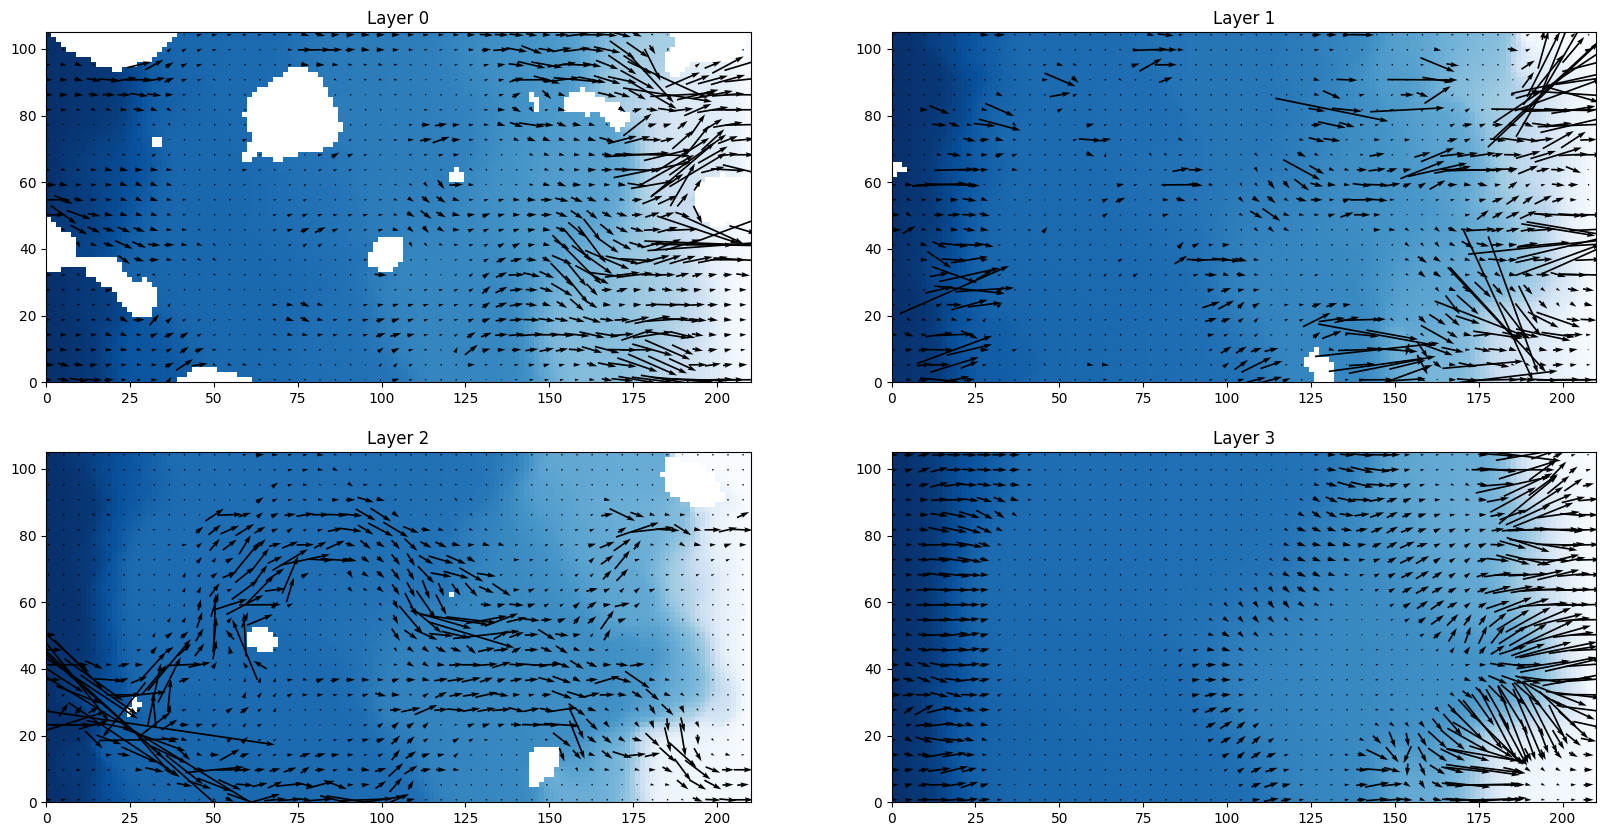

In [24]:
# plots
fig, ax = plt.subplots(2, 2, figsize=(20, 10))
axes = ax.flatten()
from flopy.plot import PlotMapView
for ilayer in range(gwf.modelgrid.nlay):
    mapview = PlotMapView(model=gwf, layer=ilayer, ax=axes[ilayer])
    quadmesh = mapview.plot_array(heads[ilayer], cmap="Blues")
    mapview.plot_vector(qx[ilayer], qy[ilayer], color="black", istep=3, jstep=3)
    axes[ilayer].set_title("Layer {}".format(ilayer))

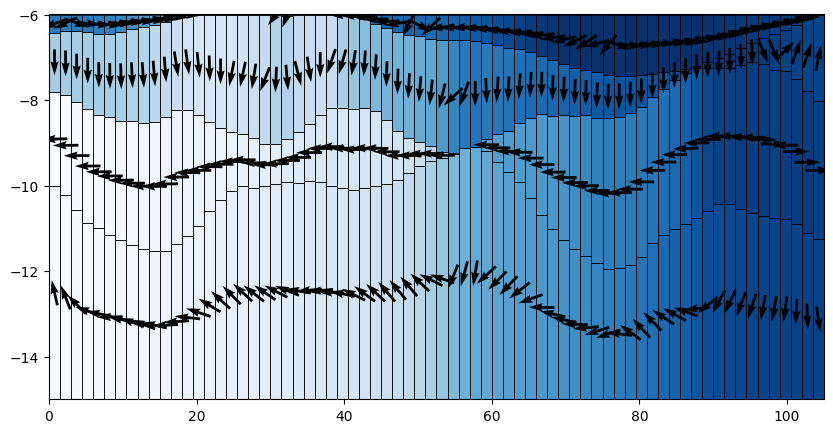

In [25]:
# plot cross section
from flopy.plot import PlotCrossSection
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
cross_section = PlotCrossSection(model=gwf, line={"column": 40})
cross_section.plot_array(heads, cmap="Blues", ax=ax)
cross_section.plot_vector(qx, qy, qz, color="black", normalize=True)
cross_section.plot_grid(linewidth=0.5, color="black")

In [26]:
workspace = sim.simulation_data.mfpath.get_sim_path()

In [27]:
# from shapely.geometry import Point, MultiPoint
# self = archpy_flow

# list_p_coord = [(70.7, 99.75, -7), (70.7, 99.75, -9), (70.7, 99.75, -11)]
# grid = self.get_gwf().modelgrid
# ix = fp.utils.gridintersect.GridIntersect(mfgrid=grid)

# list_p = []
# list_cellids = []
# for pi in list_p_coord:
#     p1 = Point(pi)
#     list_cellids.append(ix.intersect(p1).cellids[0])

# cellids = np.array([cids for cids in list_cellids])

# # multp = MultiPoint(list_p)

# # cellids = ix.intersect(multp).cellids
# # cellids = np.array([np.array(cids) for cids in cellids])
# cellids[:, 0] += 1

# l = []
# for i in range(len(cellids)):
#     cid = cellids[i]
#     exem_i = list_p_coord[i]
    
#     local_dx = (grid.xcellcenters[cid[1], cid[2]+1] - grid.xcellcenters[cid[1], cid[2]]) / 2
#     local_dy = - (grid.ycellcenters[cid[1]+1, cid[2]] - grid.ycellcenters[cid[1], cid[2]]) / 2
#     # local_dz = - (grid.zcellcenters[cid[0]+1, cid[1], cid[2]] - grid.zcellcenters[cid[0], cid[1], cid[2]]) / 2
#     local_dz = (grid.botm[cid[0]-1, cid[1], cid[2]] - grid.botm[cid[0], cid[1], cid[2]]) / 2
#     localx = (exem_i[0] - (grid.xcellcenters[cid[1], cid[2]] - local_dx)) / (2*local_dx)
#     localy = (exem_i[1] - (grid.ycellcenters[cid[1], cid[2]] - local_dy)) / (2*local_dy)
#     localz = (exem_i[2] - (grid.zcellcenters[cid[0], cid[1], cid[2]] - local_dz)) / (2*local_dz)

#     p1 = fp.modpath.mp7particledata.ParticleData([tuple(cid)], structured=True, localx=localx, localy=localy, localz=localz)
#     pg = fp.modpath.mp7particlegroup.ParticleGroup(particledata=p1)
#     l.append(pg)

In [44]:
# modpath and pathlines
# mpexe_path = "C:/Users/emmal/switchdrive2/Post_doc/prog/exe/modflow_exe/win64/mp7.exe"
mpexe_path = "E:/switchdrive/Post_doc/prog/exe/modflow_exe/win64/mp7.exe"
# mpexe_path = "C:/Users/Ludovic/switchdrive/Post_doc/prog/exe/modflow_exe/win64/mp7.exe"
archpy_flow.mp_create(mpexe=mpexe_path, 
                      trackdir="backward", 
                      list_p_coord=[(170.7, 99.75, -7), (170.7, 99.75, -9), (170.7, 99.75, -11)])

In [45]:
# archpy_flow.mp_create([(1, 20, 120)],
#                       mpexe="E:/switchdrive/Post_doc/prog/exe/modflow_exe/win64/mp7.exe", 
#                       trackdir="backward",
#                       rowcelldivisions=3, columncelldivisions=3, layercelldivisions=3)

In [46]:
archpy_flow.mp_run(silent=False)

FloPy is using the following executable to run the model: E:\switchdrive\Post_doc\prog\exe\modflow_exe\win64\mp7.exe

MODPATH Version 7.2.001   
Program compiled Jun 21 2024 03:01:44 with IFORT compiler (ver. 20.21.7)        
 
 
Run particle tracking simulation ...
Processing Time Step     1 Period     1.  Time =  1.00000E+00  Steady-state flow                                                    

Particle Summary:
         0 particles are pending release.
         0 particles remain active.
         0 particles terminated at boundary faces.
         0 particles terminated at weak sink cells.
         0 particles terminated at weak source cells.
         3 particles terminated at strong source/sink cells.
         0 particles terminated in cells with a specified zone number.
         0 particles were stranded in inactive or dry cells.
         0 particles were unreleased.
         0 particles have an unknown status.
 
Normal termination.                                                 

In [47]:
p = archpy_flow.mp_get_pathlines_object()

In [48]:
path = p.get_alldata()

In [49]:
path[0][["x", "y", "z"]][0]

(170.7, 99.75, -7.)

In [50]:
get_df_particle(archpy_flow, 0, fac_time=1/86400)

,dt,time,distance,cum_distance,x,y,z,facies_prop_1,facies_prop_4,facies_prop_6,facies_prop_2,facies_prop_3,facies_prop_5,facies_prop_7
0,1.157407e-07,0.000000e+00,0.000000,0.000000,170.699997,99.750000,-7.000000,0.0,0.666667,0.333333,0.0,0.0,0.0,0.0
1,1.157407e-07,1.157407e-07,0.000000,0.000000,170.699997,99.750000,-7.000000,0.0,0.666667,0.333333,0.0,0.0,0.0,0.0
2,1.157407e-07,2.314815e-07,0.000000,0.000000,170.699997,99.750000,-7.000000,0.0,0.666667,0.333333,0.0,0.0,0.0,0.0
3,1.157407e-07,3.472222e-07,0.000000,0.000000,170.699997,99.750000,-7.000000,0.0,0.666667,0.333333,0.0,0.0,0.0,0.0
4,1.157407e-07,4.629630e-07,0.000000,0.000000,170.699997,99.750000,-7.000000,0.0,0.666667,0.333333,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249,2.066650e-01,7.348557e+02,1.509083,182.681333,7.500000,89.507202,-6.467968,1.0,0.000000,0.000000,0.0,0.0,0.0,0.0
250,2.214355e-01,7.350624e+02,1.503328,184.184660,6.000000,89.607170,-6.467421,1.0,0.000000,0.000000,0.0,0.0,0.0,0.0
251,2.232666e-01,7.352838e+02,1.500565,185.685226,4.500000,89.648346,-6.467770,1.0,0.000000,0.000000,0.0,0.0,0.0,0.0
252,2.189941e-01,7.355071e+02,1.500019,187.185244,3.000000,89.642456,-6.463073,1.0,0.000000,0.000000,0.0,0.0,0.0,0.0


In [51]:
df = pd.DataFrame(p.get_alldata()[1])
cells_path = np.array((((df["z"].values-T1.zg[0])//T1.sz).astype(int), 
                       ((df["y"].values-T1.yg[0])//T1.sy).astype(int), 
                       ((df["x"].values-T1.xg[0])//T1.sx).astype(int))).T

In [52]:
iu = 0
ifa = 0

time_ordered = df["time"].values.copy()
time_ordered /= 86400

# add a column to track distance traveled
df["distance"] = 0
for i in range(1, df.shape[0]):
    x0, y0, z0 = df[["x", "y", "z"]].iloc[i-1]
    x1, y1, z1 = df[["x", "y", "z"]].iloc[i]
    distance = np.sqrt((x1-x0)**2 + (y1-y0)**2 + (z1-z0)**2)
    df.loc[df.index[i], "distance"] = distance

df["cum_distance"] = df["distance"].cumsum()

dic_facies_path = {}
# retrieve lithologies along the pathlines
for fa in archpy_flow.T1.get_all_facies():
    id_fa = fa.ID
    prop_fa = archpy_flow.upscaled_facies[id_fa]

    facies_along_path = prop_fa[cells_path[:, 0], cells_path[:, 1], cells_path[:, 2]]
    dic_facies_path[fa.ID] = facies_along_path

dt = np.diff(time_ordered)

# store everything in a new dataframe
df_all = pd.DataFrame(columns=["dt", "time", "distance", "cum_distance"])
df_all["dt"] = dt
df_all["time"] = time_ordered[:-1]
df_all["distance"] = df["distance"].values[:-1]
df_all["cum_distance"] = df["cum_distance"].values[:-1]

colors_fa = []
for k, v in dic_facies_path.items():
    df_all["facies_prop_"+ str(k)] = v[:-1]
    colors_fa.append(archpy_flow.T1.get_facies_obj(ID=k, type="ID").c)
# df_all["facies"] = facies_along_path[:-1]

(-0.1, 1.1)

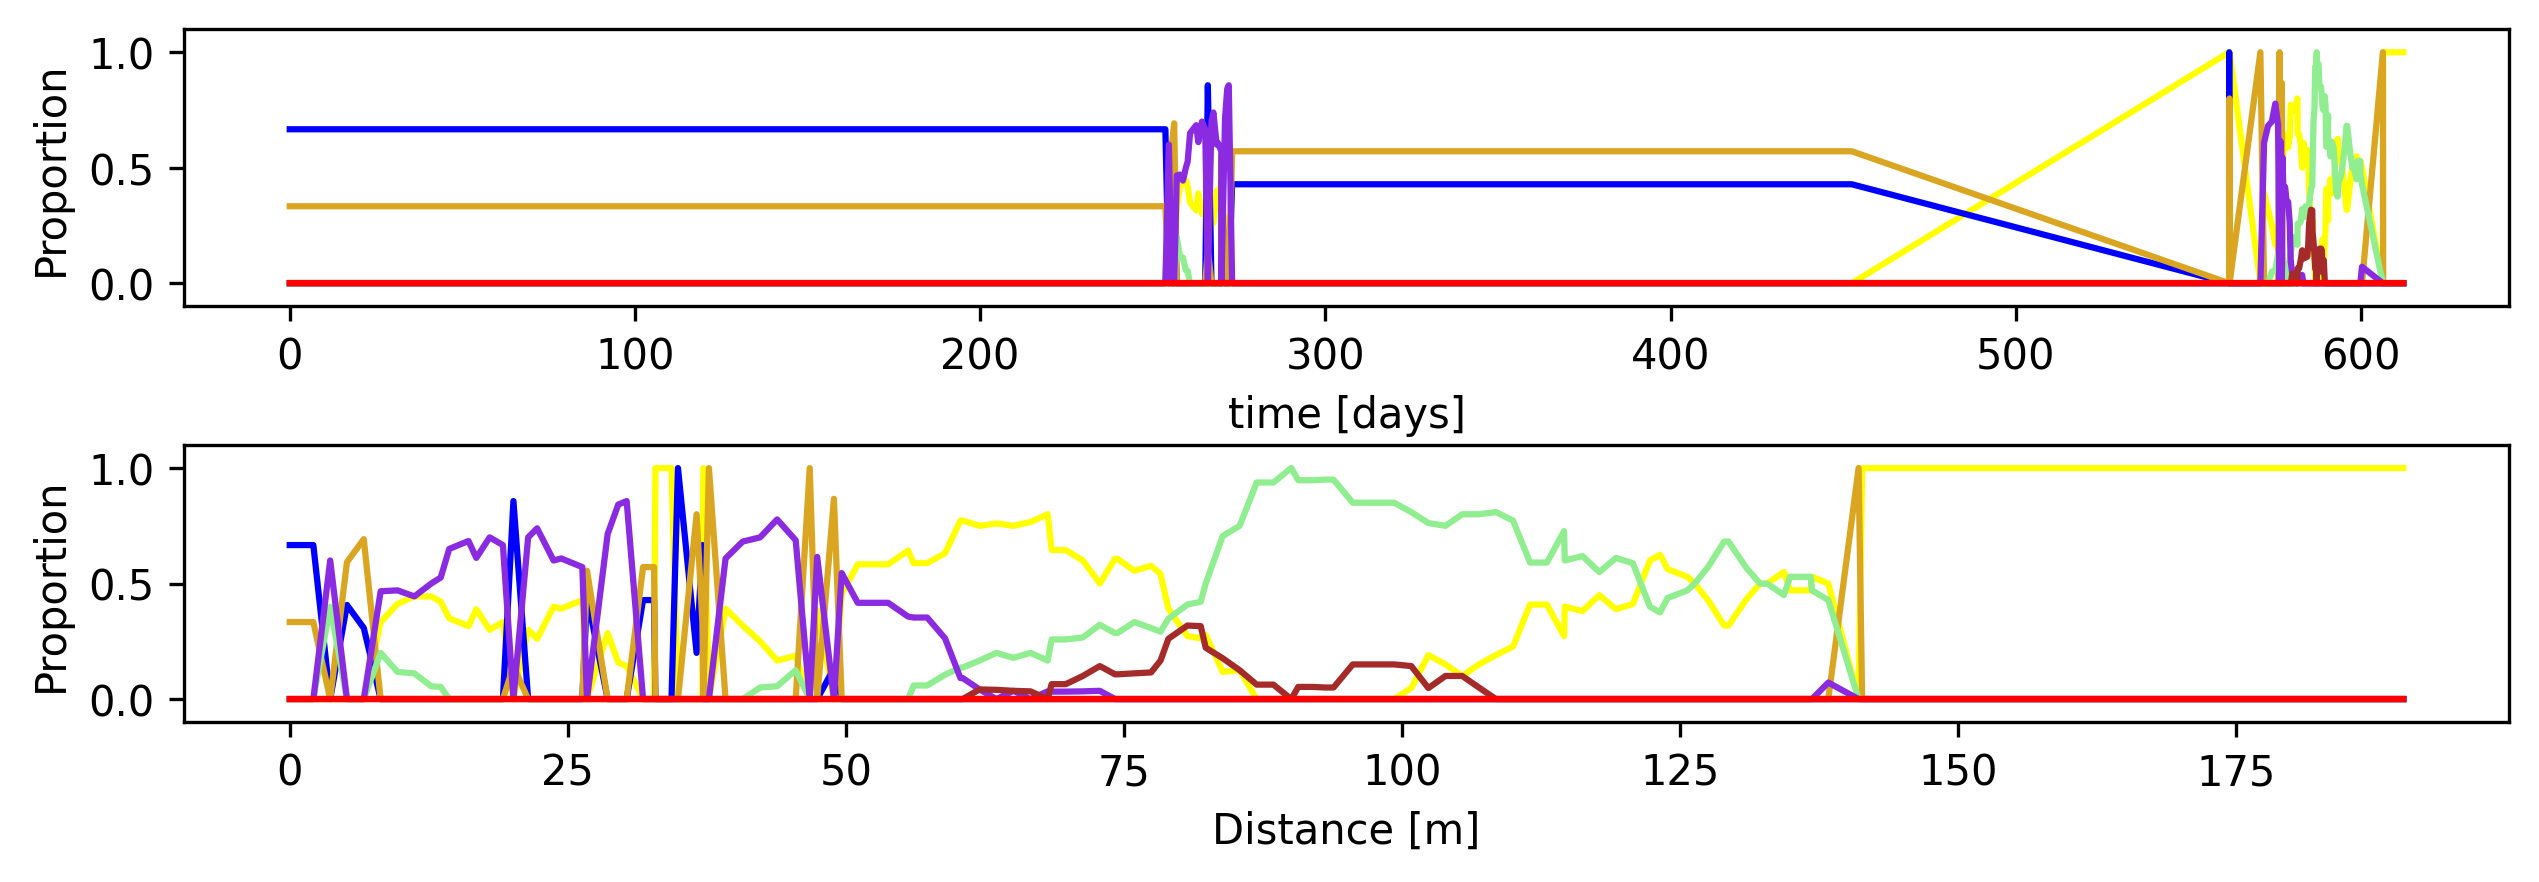

In [54]:
fig, ax = plt.subplots(2, 1, figsize=(10, 3), dpi=300)
plt.subplots_adjust(hspace=0.5)
df_all.set_index("time").iloc[:, 3:].plot(color=colors_fa, legend=False, ax=ax[0])
ax[0].set_ylabel("Proportion")
ax[0].set_xlabel("time [days]")
ax[0].set_ylim(-.1, 1.1)

df_all.set_index("cum_distance").iloc[:, 3:].plot(color=colors_fa, legend=False, ax=ax[1])
ax[1].set_ylabel("Proportion")
ax[1].set_xlabel("Distance [m]")
ax[1].set_ylim(-.1, 1.1)

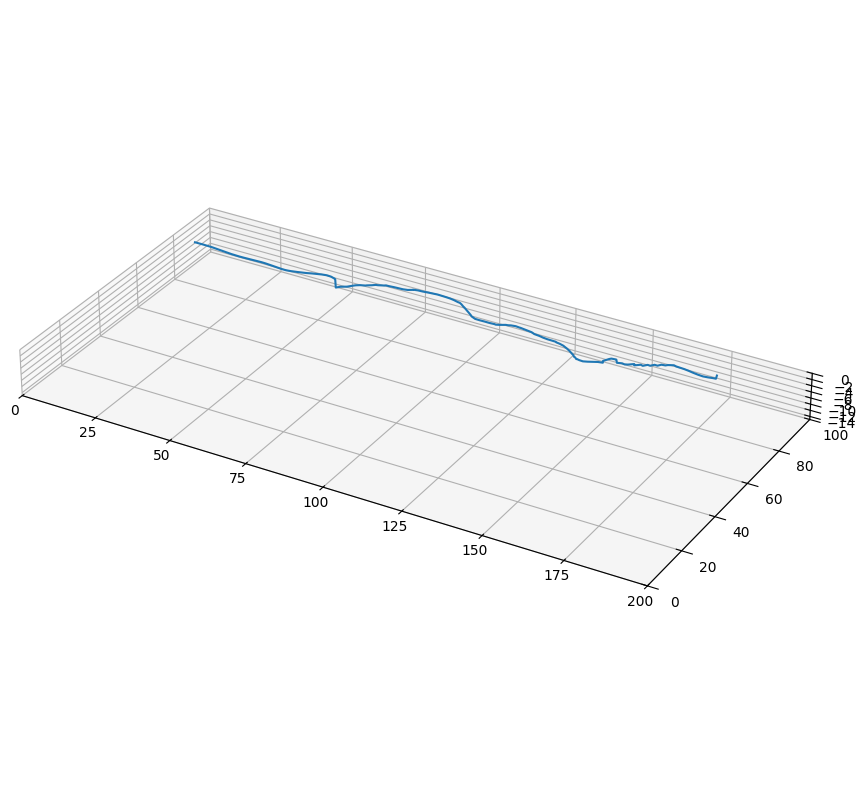

In [56]:
# 3D plot of the pathlines
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection="3d")

for pth in path[1:2]:
    ax.plot(pth["x"], pth["y"], pth["z"])

plt.xlim(0, 200)
plt.ylim(0, 100)
ax.set_zlim(-15, 0)
ax.set_aspect("equal")
plt.show()

In [205]:
# create an array with k values of the layer mode
self = archpy_flow
gwf = self.get_gwf()
nrow, ncol, nlay = gwf.modelgrid.nrow, gwf.modelgrid.ncol, gwf.modelgrid.nlay

# initialize new_k and new_k33
kh = self.T1.get_prop("K")[0, 0, 0] 
new_k = np.zeros(kh.shape)
new_k33 = np.zeros(kh.shape)

layers = self.layers_names
mask_units = [self.T1.unit_mask(l).astype(bool) for l in layers]

for irow in range(nrow):
    for icol in range(ncol):
        for ilay in range(nlay):
            mask_unit = mask_units[ilay]
            new_k[:, irow, icol][mask_unit[:, irow, icol]] = np.mean(kh[:, irow, icol][mask_unit[:, irow, icol]])
            new_k33[:, irow, icol][mask_unit[:, irow, icol]] = 1 / np.mean(1 / kh[:, irow, icol][mask_unit[:, irow, icol]])

new_k[new_k == 0] = np.nan
new_k33[new_k33 == 0] = np.nan
k_lay = new_k.copy()

In [206]:
T1.plot_arr(k_lay, v_ex=3, slicex=0.5, slicey=0.5)

Widget(value='<iframe src="http://localhost:55168/index.html?ui=P_0x2f001207410_15&reconnect=auto" class="pyvi…

### Upscaled model

In [191]:
archpy_flow = archpy2modflow(T1, exe_name="../../../../exe/mf6.exe")
archpy_flow.create_sim(grid_mode="new_resolution", iu=0, factor_x=4, factor_y=2, factor_z=2)
archpy_flow.set_k(k_key="K", iu=0, ifa=0, ip=0, log=True,
                k_average_method="new_resolution")

Simulation created
To retrieve the simulation, use the get_sim() method


In [208]:
sim = archpy_flow.get_sim()
gwf = archpy_flow.get_gwf()

In [218]:
pv.set_jupyter_backend("static")

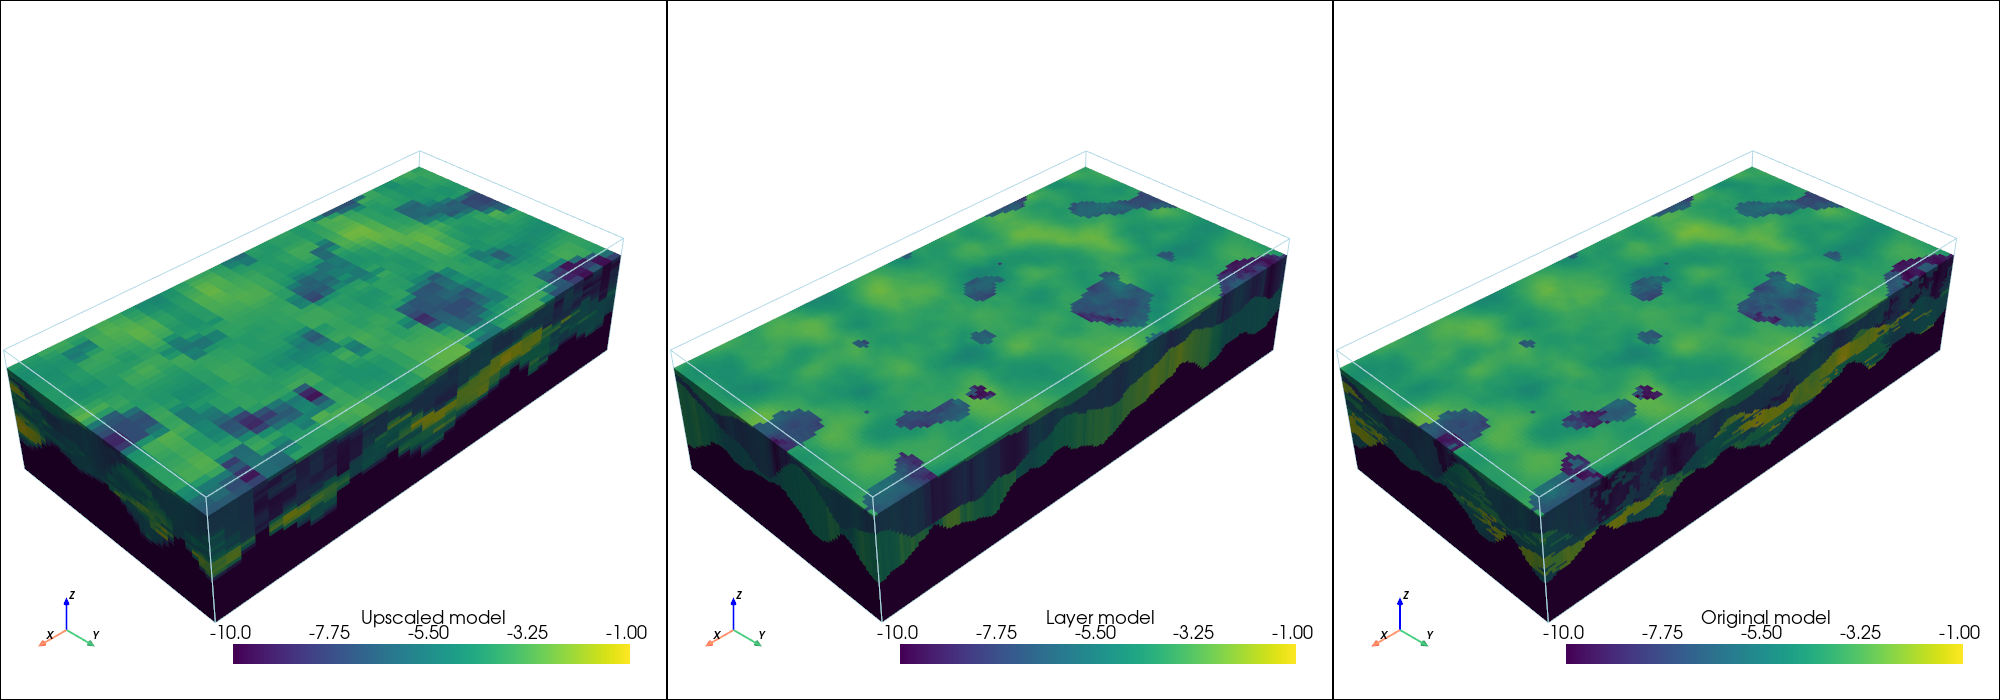

In [223]:
pl = pv.Plotter(shape=(1, 3), window_size=[2000, 700])
v_ex=10
sim = archpy_flow.get_sim()
gwf = archpy_flow.get_gwf()
arr = np.log10(gwf.npf.k.array)
arr[arr==arr[0, 0, 0]] = np.nan
arr = np.flip(np.flipud(arr), axis=1)
im = geone.img.Img(nx=arr.shape[2], ny=arr.shape[1], nz=arr.shape[0], sx=gwf.dis.delr[0], sy=gwf.dis.delc[0], sz=0.15*v_ex, val=arr, nv=1,
                   varname=["Upscaled model"])
geone.imgplot3d.drawImage3D_surface(im, plotter=pl)


pl.subplot(0, 1)
arr = k_lay
im = geone.img.Img(nx=arr.shape[2], ny=arr.shape[1], nz=arr.shape[0], sx=3, sy=3, sz=0.15*v_ex, nv=1,
                    val=arr.reshape(1, *arr.shape), varname=["Layer model"])
geone.imgplot3d.drawImage3D_surface(im, plotter=pl)

pl.subplot(0, 2)
arr = T1.get_prop("K", 0, 0, 0, all_data=False)
im = geone.img.Img(nx=arr.shape[2], ny=arr.shape[1], nz=arr.shape[0], sx=3, sy=3, sz=0.15*v_ex, nv=1,
                    val=arr.reshape(1, *arr.shape), varname=["Original model"])
geone.imgplot3d.drawImage3D_surface(im, plotter=pl)

pl.show()

In [48]:
# add BC at left and right on all layers
h1 = 100
h2 = 0
chd_data = []

a = np.zeros((gwf.modelgrid.nlay, gwf.modelgrid.nrow, gwf.modelgrid.ncol), dtype=bool)
a[:, :, 0] = 1
lst_chd = array2cellids(a, gwf.dis.idomain.array)
for cellid in lst_chd:
    chd_data.append((cellid, h1))

a = np.zeros((gwf.modelgrid.nlay, gwf.modelgrid.nrow, gwf.modelgrid.ncol), dtype=bool)
a[:, :, -1] = 1
lst_chd = array2cellids(a, gwf.dis.idomain.array)
for cellid in lst_chd:
    chd_data.append((cellid, h2))

chd = fp.mf6.ModflowGwfchd(gwf, stress_period_data=chd_data, save_flows=True)

In [79]:
sim.write_simulation()
sim.ims.complexity = "moderate"
sim.ims.write()
sim.run_simulation()

writing simulation...
  writing simulation name file...
  writing simulation tdis package...
  writing solution package ims_-1...
  writing model test...
    writing model name file...
    writing package dis...
    writing package ic...
    writing package oc...
    writing package npf...
    writing package chd_0...
FloPy is using the following executable to run the model: ..\..\..\..\..\exe\mf6.exe
                                   MODFLOW 6
                U.S. GEOLOGICAL SURVEY MODULAR HYDROLOGIC MODEL
                            VERSION 6.5.0 05/23/2024

   MODFLOW 6 compiled Jun 21 2024 02:57:23 with Intel(R) Fortran Intel(R) 64
   Compiler Classic for applications running on Intel(R) 64, Version 2021.7.0
                             Build 20220726_000000

This software has been approved for release by the U.S. Geological 
Survey (USGS). Although the software has been subjected to rigorous 
review, the USGS reserves the right to update the software as needed 
pursuant to furthe

(True, [])

In [50]:
mpexe_path = "C:/Users/Ludovic/switchdrive/Post_doc/prog/exe/modflow_exe/win64/mp7.exe"
archpy_flow.mp_create(mpexe=mpexe_path, 
                      trackdir="backward", 
                      list_p_coord=[(70.7, 99.75, -7), (70.7, 99.75, -9), (70.7, 99.75, -11)])
archpy_flow.mp_run(silent=False)

FloPy is using the following executable to run the model: ..\..\..\..\..\..\Switchdrive\Post_doc\prog\exe\modflow_exe\win64\mp7.exe

MODPATH Version 7.2.001   
Program compiled Jun 21 2024 03:01:44 with IFORT compiler (ver. 20.21.7)        
 
 
Run particle tracking simulation ...
Processing Time Step     1 Period     1.  Time =  1.00000E+00  Steady-state flow                                                    

Particle Summary:
         0 particles are pending release.
         0 particles remain active.
         0 particles terminated at boundary faces.
         0 particles terminated at weak sink cells.
         0 particles terminated at weak source cells.
         3 particles terminated at strong source/sink cells.
         0 particles terminated in cells with a specified zone number.
         0 particles were stranded in inactive or dry cells.
         0 particles were unreleased.
         0 particles have an unknown status.
 
Normal termination.                                  

In [88]:
df_pi = get_df_particle(archpy_flow, 0, fac_time=1/86400)

In [89]:
colors_fa = []
for col in df_pi.columns:
    if col.split("_")[0] == "facies":
        id_fa = int(col.split("_")[-1])
        color_fa = archpy_flow.T1.get_facies_obj(ID=id_fa, type="ID").c
        colors_fa.append(color_fa)

(-0.1, 1.1)

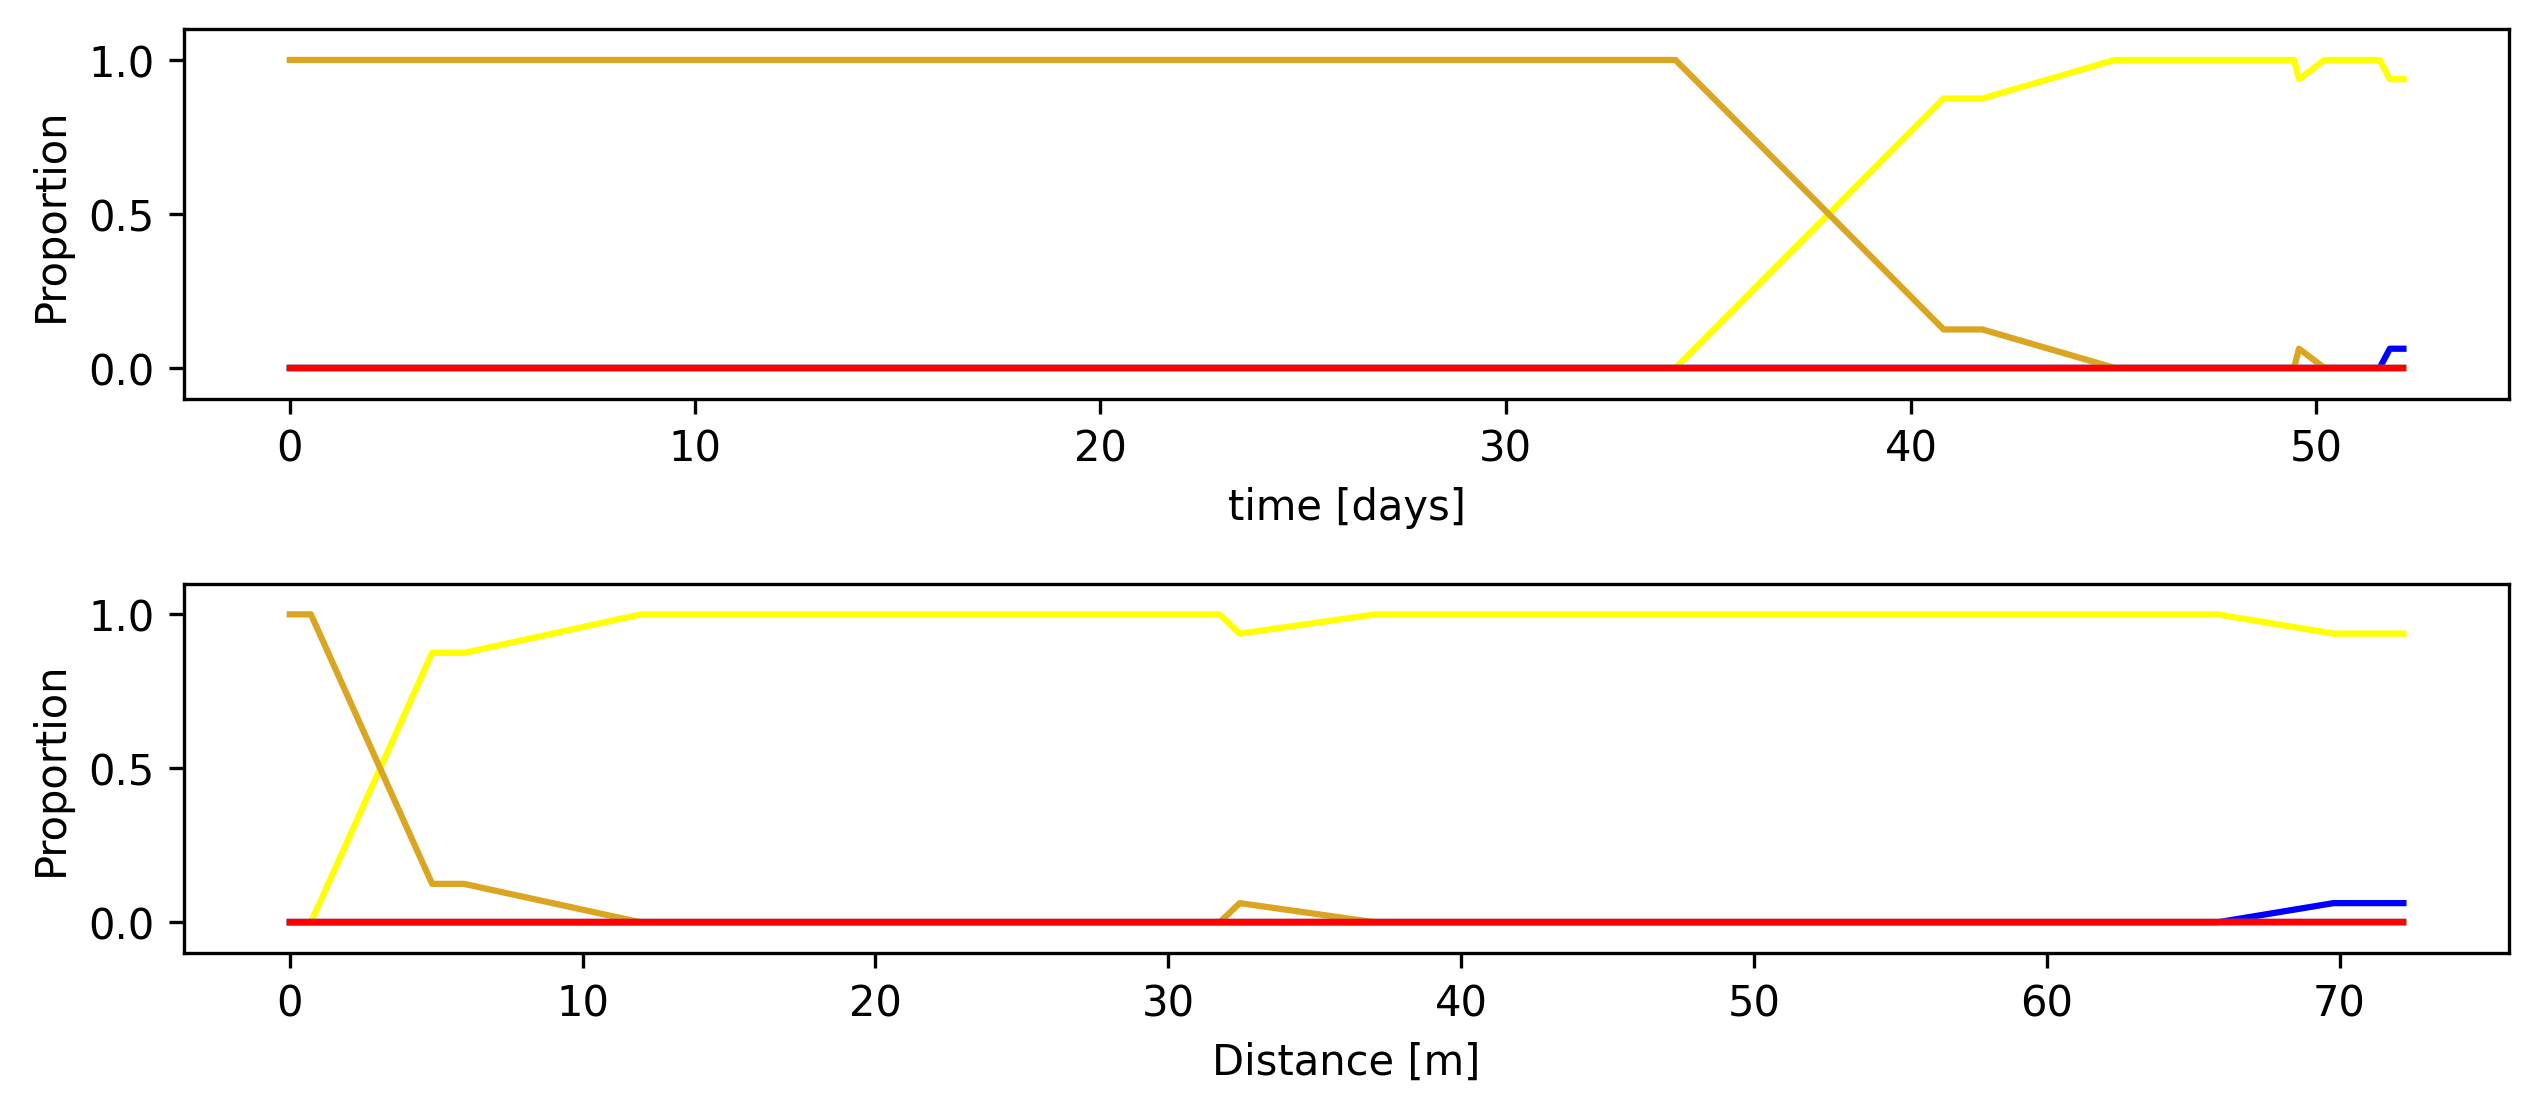

In [ ]:
fig, ax = plt.subplots(2, 1, figsize=(10, 4), dpi=300)
plt.subplots_adjust(hspace=0.5)
df_pi.set_index("time").iloc[:, 3:].plot(color=colors_fa, legend=False, ax=ax[0])
ax[0].set_ylabel("Proportion")
ax[0].set_xlabel("time [days]")
ax[0].set_ylim(-.1, 1.1)

df_pi.set_index("cum_distance").iloc[:, 3:].plot(color=colors_fa, legend=False, ax=ax[1])
ax[1].set_ylabel("Proportion")
ax[1].set_xlabel("Distance [m]") 
ax[1].set_ylim(-.1, 1.1)

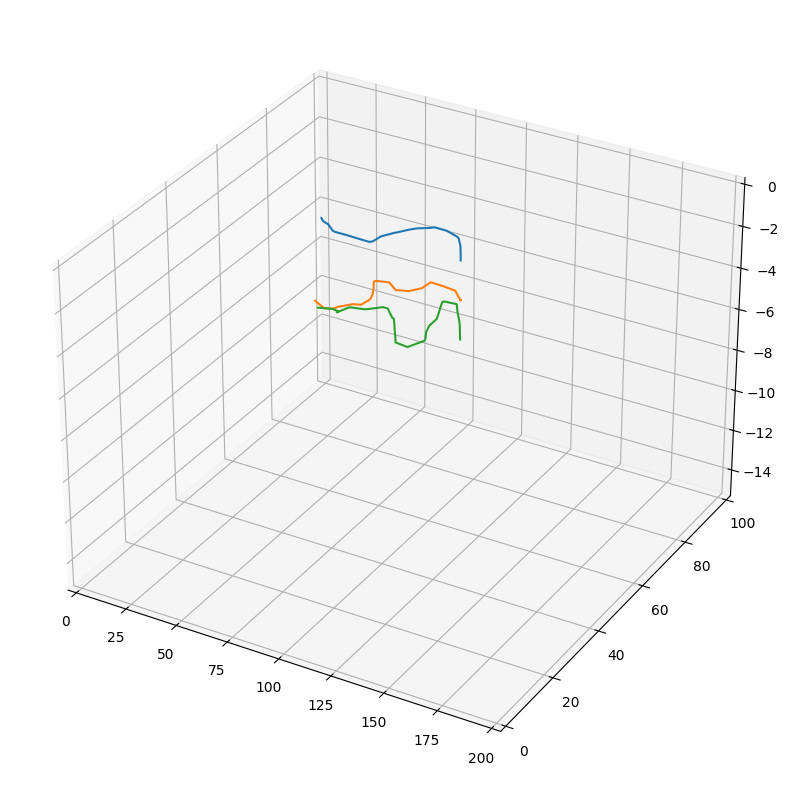

In [84]:
p = archpy_flow.mp_get_pathlines_object()
path = p.get_alldata()
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection="3d")

for pth in path[:]:
    ax.plot(pth["x"], pth["y"], pth["z"])

plt.xlim(0, 200)
plt.ylim(0, 100)
ax.set_zlim(-15, 0)
plt.show()

how to compare pathlines using different grid mode ?

- compute distance between the two pathlines (optimal transport, minimal surface ?)
- difference between time and distance traveled
- compare facies encountered (but how ?)
- compare units encountered

## Comparisons

In [19]:
np.random.seed(1)
# compare pathlines between the 3 modes

n_loc = 10
particles_loc_x = np.random.uniform(100, T1.get_xg()[-1], n_loc)
particles_loc_y = np.random.uniform(0, T1.get_yg()[-1], n_loc)
particles_loc_z = np.random.uniform(-12, -7, n_loc)
particles_loc = list(zip(particles_loc_x, particles_loc_y, particles_loc_z))
particles_loc.append((170.7, 99.75, -9))
n_loc += 1

In [20]:
def add_chd(archpy_flow, h1=100, h2=0):

    # add BC at left and right on all layers
    chd_data = []

    gwf = archpy_flow.get_gwf()
    
    a = np.zeros((gwf.modelgrid.nlay, gwf.modelgrid.nrow, gwf.modelgrid.ncol), dtype=bool)
    a[:, :, 0] = 1
    lst_chd = array2cellids(a, gwf.dis.idomain.array)
    for cellid in lst_chd:
        chd_data.append((cellid, h1))

    a = np.zeros((gwf.modelgrid.nlay, gwf.modelgrid.nrow, gwf.modelgrid.ncol), dtype=bool)
    a[:, :, -1] = 1
    lst_chd = array2cellids(a, gwf.dis.idomain.array)
    for cellid in lst_chd:
        chd_data.append((cellid, h2))

    chd = fp.mf6.ModflowGwfchd(gwf, stress_period_data=chd_data, save_flows=True)

In [21]:
iu = 0
ifa = 0

# mpexe_path = "C:/Users/emmal/switchdrive2/Post_doc/prog/exe/modflow_exe/win64/mp7.exe"
mpexe_path = "E:/switchdrive/Post_doc/prog/exe/modflow_exe/win64/mp7.exe"
# mpexe_path = "C:/Users/Ludovic/switchdrive/Post_doc/prog/exe/modflow_exe/win64/mp7.exe"
modflow_path = "../../../../exe/mf6.exe"

# Archpy grid mode #
archpy_flow = archpy2modflow(T1, exe_name=modflow_path)
archpy_flow.create_sim(grid_mode="archpy", iu=iu)
archpy_flow.set_k("K", iu, ifa, 0, log=True)

sim = archpy_flow.get_sim()

add_chd(archpy_flow, 100, 0)

sim.write_simulation()
sim.ims.complexity = "complex"
sim.ims.write()
sim.run_simulation()

archpy_flow.mp_create(mpexe=mpexe_path, 
                      trackdir="backward", 
                      list_p_coord=particles_loc)
archpy_flow.mp_run(silent=False)

l_df_pi = []
for pi in range(n_loc):
    df_pi = get_df_particle(archpy_flow, pi, fac_time=1/86400)
    l_df_pi.append(df_pi)

# Layers grid mode #
archpy_flow = archpy2modflow(T1, exe_name=modflow_path)
archpy_flow.create_sim(grid_mode="layers", iu=iu)
archpy_flow.set_k("K", iu, ifa, 0, log=True)

sim = archpy_flow.get_sim()

add_chd(archpy_flow, 100, 0)

sim.write_simulation()
sim.ims.complexity = "moderate"
sim.ims.write()
sim.run_simulation()

archpy_flow.mp_create(mpexe=mpexe_path,
                        trackdir="backward",
                        list_p_coord=particles_loc)
archpy_flow.mp_run(silent=False)

l_df_pi_layers = []
for pi in range(n_loc):
    df_pi = get_df_particle(archpy_flow, pi, fac_time=1/86400)
    l_df_pi_layers.append(df_pi)

# New resolution grid mode #
archpy_flow = archpy2modflow(T1, exe_name=modflow_path)
archpy_flow.create_sim(grid_mode="new_resolution", iu=iu, factor_x=4, factor_y=2, factor_z=2)
archpy_flow.set_k("K", iu, ifa, 0, log=True, k_average_method="new_resolution")

sim = archpy_flow.get_sim()

add_chd(archpy_flow, 100, 0)

sim.write_simulation()
sim.ims.complexity = "moderate"
sim.ims.write()
sim.run_simulation()

archpy_flow.mp_create(mpexe=mpexe_path,
                        trackdir="backward",
                        list_p_coord=particles_loc)
archpy_flow.mp_run(silent=False)

l_df_pi_new_res = []
for pi in range(n_loc):
    df_pi = get_df_particle(archpy_flow, pi, fac_time=1/86400)
    l_df_pi_new_res.append(df_pi)


Simulation created
To retrieve the simulation, use the get_sim() method
writing simulation...
  writing simulation name file...
  writing simulation tdis package...
  writing solution package ims_-1...
  writing model test...
    writing model name file...
    writing package dis...
    writing package ic...
    writing package oc...
    writing package npf...
    writing package chd_0...
INFORMATION: maxbound in ('gwf6', 'chd', 'dimensions') changed to 8400 based on size of stress_period_data
FloPy is using the following executable to run the model: ..\..\..\..\..\exe\mf6.exe
                                   MODFLOW 6
                U.S. GEOLOGICAL SURVEY MODULAR HYDROLOGIC MODEL
                            VERSION 6.5.0 05/23/2024

   MODFLOW 6 compiled Jun 21 2024 02:57:23 with Intel(R) Fortran Intel(R) 64
   Compiler Classic for applications running on Intel(R) 64, Version 2021.7.0
                             Build 20220726_000000

This software has been approved for release by

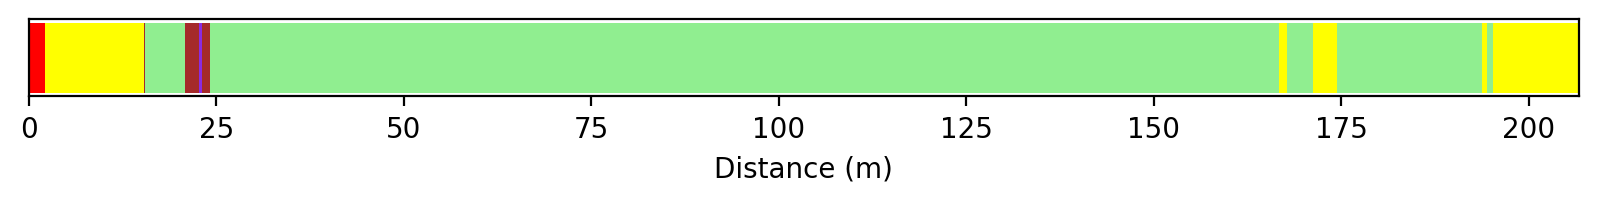

In [22]:
plot_particle_tracking(archpy_flow.T1, l_df_pi[8], plot_distance=True)

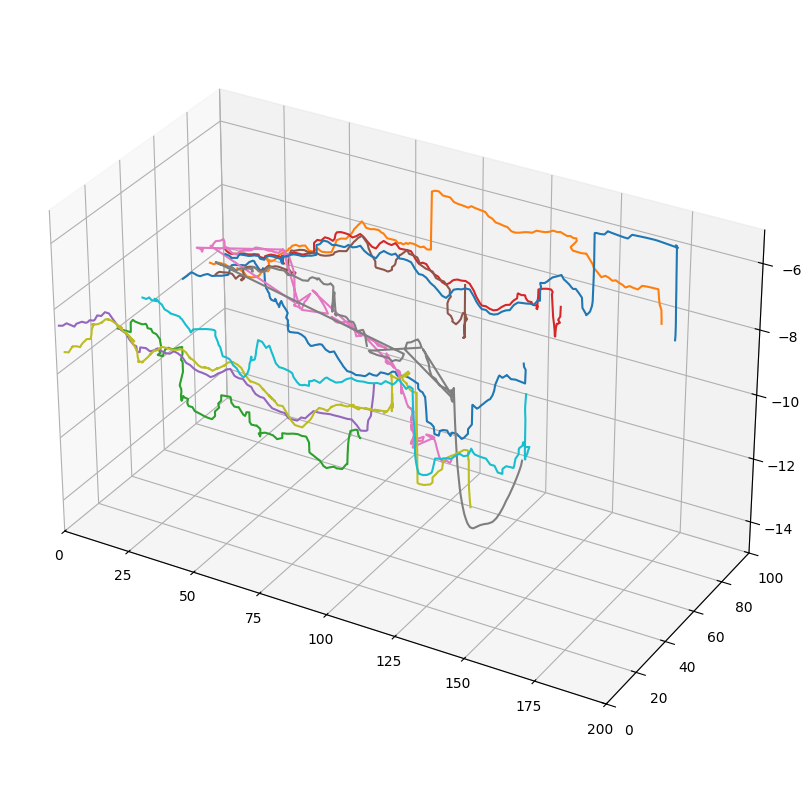

In [23]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection="3d")

for df in l_df_pi:
    ax.plot(df["x"], df["y"], df["z"])
    
plt.xlim(0, 200)
plt.ylim(0, 100)
ax.set_zlim(-15, -5)
ax.set_aspect("equalxy")
plt.show()

In [24]:
df = pd.DataFrame(archpy_flow.mp_get_pathlines_object().get_data(6))
df.time /= 86400

In [25]:
df["cellids"] = get_locs(df.node)


In [71]:
df.iloc[135:165]

,particleid,particlegroup,sequencenumber,particleidloc,time,x,y,z,k,node,xloc,yloc,zloc,stressperiod,timestep,cellids
135,6,6,6,0,619302.779259,65.680870,62.128418,-9.600014,16,20100,0.946811,0.709473,0.000000,1,1,"(2, 3, 80)"
136,6,6,6,0,619302.779259,66.000000,62.133289,-9.595305,16,20101,0.000000,0.711097,0.015695,1,1,"(2, 3, 81)"
137,6,6,6,0,619303.063704,60.000000,61.078972,-9.853073,17,21325,0.000000,0.359657,0.156468,1,1,"(2, 12, 45)"
138,6,6,6,0,619303.111111,59.451496,61.080666,-9.900013,17,21324,0.908583,0.360222,0.000000,1,1,"(2, 12, 44)"
139,6,6,6,0,619303.253333,58.710880,63.000000,-10.145133,18,22549,0.785147,1.000000,0.182931,1,1,"(2, 21, 9)"
140,6,6,6,0,619303.300741,57.594814,64.064240,-10.200012,18,22514,0.599136,0.354747,0.000000,1,1,"(2, 20, 114)"
141,6,6,6,0,619303.680000,54.000000,64.064240,-10.375741,19,23739,0.000000,0.354747,0.414236,1,1,"(2, 29, 79)"
142,6,6,6,0,619303.964444,48.000000,64.386368,-10.426047,19,23738,0.000000,0.462122,0.246548,1,1,"(2, 29, 78)"
143,6,6,6,0,619304.059259,46.367508,64.514572,-10.500011,19,23737,0.727918,0.504858,0.000000,1,1,"(2, 29, 77)"
144,6,6,6,0,619304.343704,45.994720,66.035370,-10.800011,21,26152,0.665787,0.011790,1.000000,1,1,"(2, 46, 112)"


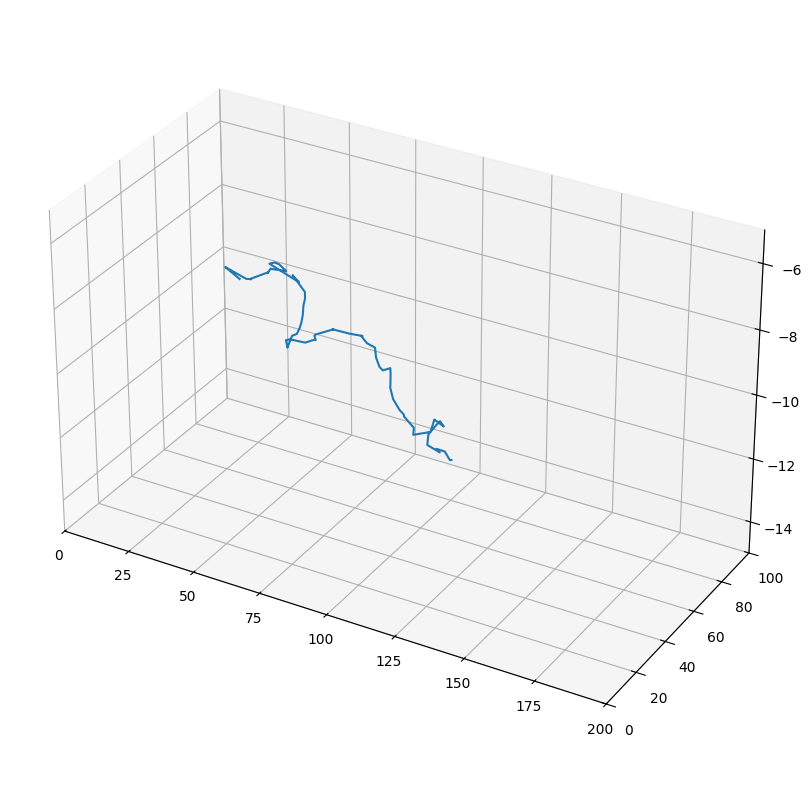

In [72]:



idf = df

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection="3d")

ax.plot(idf["x"], idf["y"], idf["z"])
plt.xlim(0, 200)
plt.ylim(0, 100)
ax.set_zlim(-15, -5)
ax.set_aspect("equalxy")



In [73]:

i = 126
distance = (((df.iloc[i].x - df.x) ** 2 + (df.iloc[i].y - df.y) ** 2 + (df.iloc[i].z - df.z) ** 2)**0.5)

# find 2nd minimum distance
idx = distance[distance > 0].idxmin()
idx

125

In [74]:
np.argmin(distance)

126

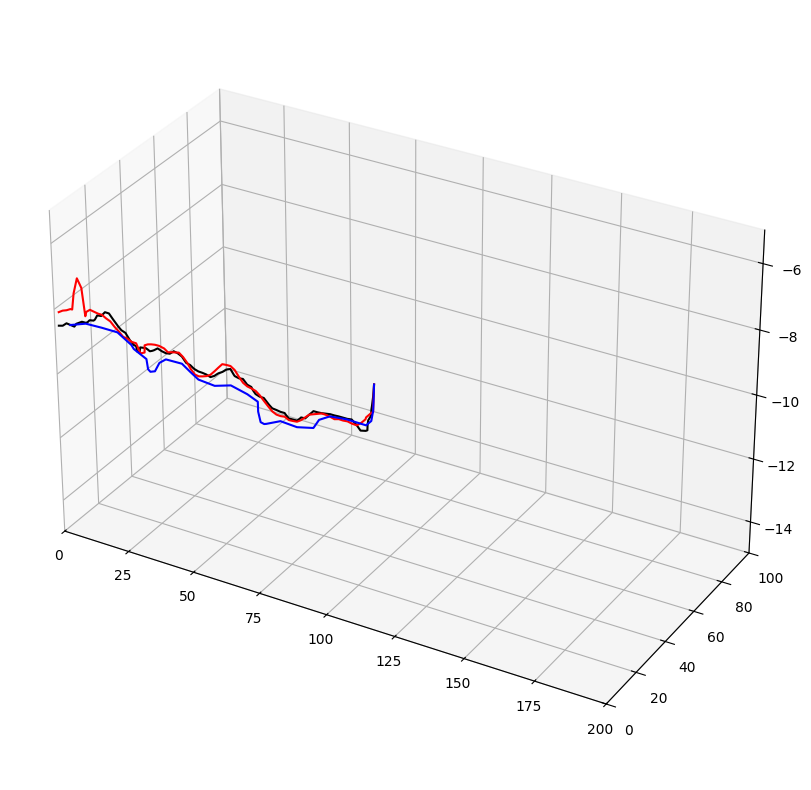

In [94]:
%matplotlib inline
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection="3d")

i_particle = 4
for df in [l_df_pi[i_particle]]:
    ax.plot(df["x"], df["y"], df["z"], color="k")

for df in [l_df_pi_layers[i_particle]]:
    ax.plot(df["x"], df["y"], df["z"], color="r")
    # ax.scatter(df["x"], df["y"], df["z"], color="r")
for df in [l_df_pi_new_res[i_particle]]:
    ax.plot(df["x"], df["y"], df["z"], color="b")
    
plt.xlim(0, 200)
plt.ylim(0, 100)
ax.set_zlim(-15, -5)
ax.set_aspect("equalxy")
plt.show()

In [178]:
path1 = l_df_pi[4][["x", "y", "z", "time"]]
# indicate that time column is in days and set as index
# path1.loc[:, "time"] = pd.to_timedelta(path1["time"], unit="d")

path2 = l_df_pi_layers[4][["x", "y", "z", "time"]]
# indicate that time column is in days and set as index
# path2.loc[:, "time"] = pd.to_timedelta(path2["time"], unit="d")

# from dtaidistance import dtw_ndim
# d = dtw_ndim.distance(path1.values, path2.values)

# DTW(path1.values, path2.values)

# merge the two dataframes on time
df_merge = pd.merge(path1, path2, on="time", suffixes=("_1", "_2"), how="outer").fillna(method="ffill").set_index("time")
path1 = df_merge[["x_1", "y_1", "z_1"]]
path2 = df_merge[["x_2", "y_2", "z_2"]]
path1

,x_1,y_1,z_1
time,,,
0.000000e+00,116.14315,2.875697,-7.618054
1.157407e-07,116.14315,2.875697,-7.618054
2.314815e-07,116.14315,2.875697,-7.618054
3.472222e-07,116.14315,2.875697,-7.618054
4.629630e-07,116.14315,2.875697,-7.618054
...,...,...,...
4.372495e+02,1.50000,0.091187,-8.468578
4.373531e+02,1.50000,0.091187,-8.468578
4.375587e+02,1.50000,0.091187,-8.468578


In [184]:
df_merge

,x_1,y_1,z_1,x_2,y_2,z_2
time,,,,,,
0.000000e+00,116.14315,2.875697,-7.618054,116.143150,2.875697,-7.618054
1.157407e-07,116.14315,2.875697,-7.618054,116.143150,2.875697,-7.618054
2.314815e-07,116.14315,2.875697,-7.618054,116.143150,2.875697,-7.618054
3.472222e-07,116.14315,2.875697,-7.618054,116.143150,2.875697,-7.618054
4.629630e-07,116.14315,2.875697,-7.618054,116.143150,2.875697,-7.618054
...,...,...,...,...,...,...
4.372495e+02,1.50000,0.091187,-8.468578,6.675505,0.489071,-7.868068
4.373531e+02,1.50000,0.091187,-8.468578,6.000000,0.461351,-7.868979
4.375587e+02,1.50000,0.091187,-8.468578,4.500000,0.422611,-7.938735


In [98]:
from dtaidistance import dtw_ndim
d = dtw_ndim.distance(path1.values, path2.values)
d

31.526345068262753

In [59]:
frechet_distance(path1.values, path2.values)

32.67633290370492

In [60]:
hausdorff_distance(path1.values, path2.values)

30.542784132975683

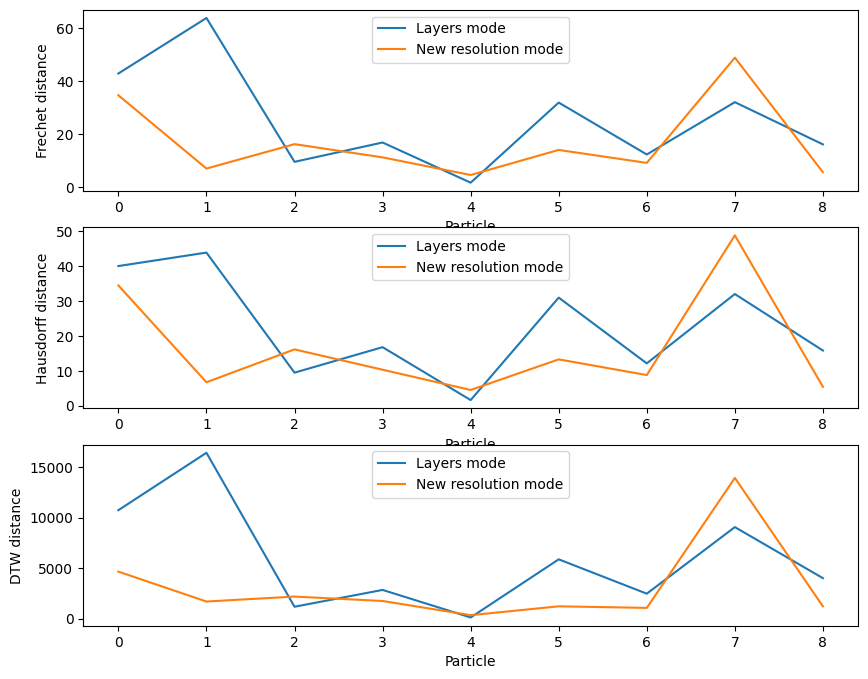

Frechet distance
Layers mode:  25.14319068684252
New resolution mode:  16.726461990902795
Hausdorff distance
Layers mode:  22.482924438581566
New resolution mode:  16.464682939227103
DTW distance
Layers mode:  5857.538077410449
New resolution mode:  3112.824440859174


In [190]:
# write a function to compute the frechet distance between two pathlines
from scipy.spatial import distance

def DTW(path1, path2):
    """
    Compute the Frechet distance between two pathlines
    """

    
    # compute the distance between each point of the two pathlines
    dist = distance.cdist(path1, path2)

    # compute frechet matrix
    MF = np.zeros(dist.shape)
    for i in range(dist.shape[0]):
        for j in range(dist.shape[1]):
            if i == 0 and j == 0:
                MF[i, j] = dist[i, j]
            elif i == 0:
                MF[i, j] = dist[i, j]
            elif j == 0:
                MF[i, j] = dist[i, j]
            else:
                MF[i, j] = dist[i, j] + min(MF[i-1, j], MF[i, j-1], MF[i-1, j-1])

    return MF[-1, -1]

def frechet_distance(path1, path2):

    # compute the distance between each point of the two pathlines
    dist = distance.cdist(path1, path2)

    # compute frechet matrix
    MF = np.zeros(dist.shape)
    for i in range(dist.shape[0]):
        for j in range(dist.shape[1]):
            if i == 0 and j == 0:
                MF[i, j] = dist[i, j]
            elif i == 0:
                MF[i, j] = max(MF[i, j-1], dist[i, j])
            elif j == 0:
                MF[i, j] = max(MF[i-1, j], dist[i, j])
            else:
                MF[i, j] = max(min(MF[i-1, j], MF[i, j-1], MF[i-1, j-1]), dist[i, j])
    
    return MF[-1, -1]

def hausdorff_distance(path1, path2):
    """
    Compute the Hausdorff distance between two pathlines
    """
    
    from scipy.spatial.distance import directed_hausdorff

    d1 = directed_hausdorff(path1, path2)
    return d1[0]


l_layer_frechet = []
l_new_res_frechet = []
l_layer_hausdorff = []
l_new_res_hausdorff = []
l_layer_dtw = []
l_new_res_dtw = []
for i_particle in range(n_loc):
    if i_particle in [6, 7]:
        # l_layer_frechet.append(np.nan)
        # l_layer_hausdorff.append(np.nan)
        # l_new_res_frechet.append(np.nan)
        # l_new_res_hausdorff.append(np.nan)
        # l_layer_dtw.append(np.nan)
        # l_new_res_dtw.append(np.nan)
        pass
    else:
        # compute frechet and hausdorffdistance
        path1 = l_df_pi[i_particle][["x", "y", "z"]].values
        path2 = l_df_pi_layers[i_particle][["x", "y", "z"]].values
        l_layer_frechet.append(frechet_distance(path1, path2))
        l_layer_hausdorff.append(hausdorff_distance(path1, path2))

        path2 = l_df_pi_new_res[i_particle][["x", "y", "z"]].values
        l_new_res_frechet.append(frechet_distance(path1, path2))
        l_new_res_hausdorff.append(hausdorff_distance(path1, path2))
        
        # # DTW
        path1 = l_df_pi[i_particle][["x", "y", "z", "time"]]
        # path1.loc[:, "time"] = pd.to_timedelta(path1["time"], unit="d")

        path2 = l_df_pi_layers[i_particle][["x", "y", "z", "time"]]
        # path2.loc[:, "time"] = pd.to_timedelta(path2["time"], unit="d")

        # # merge the two dataframes on time
        df_merge = pd.merge(path1, path2, on="time", suffixes=("_1", "_2"), how="outer").fillna(method="ffill").set_index("time")
        path1 = df_merge[["x_1", "y_1", "z_1"]]
        path2 = df_merge[["x_2", "y_2", "z_2"]]

        l_layer_dtw.append(DTW(path1.values, path2.values))

        path1 = l_df_pi[i_particle][["x", "y", "z", "time"]]
        # path1.loc[:, "time"] = pd.to_timedelta(path1["time"], unit="d")

        path2 = l_df_pi_new_res[i_particle][["x", "y", "z", "time"]]
        # path2.loc[:, "time"] = pd.to_timedelta(path2["time"], unit="d")

        # # merge the two dataframes on time
        df_merge = pd.merge(path1, path2, on="time", suffixes=("_1", "_2"), how="outer").fillna(method="ffill").set_index("time")
        path1 = df_merge[["x_1", "y_1", "z_1"]]
        path2 = df_merge[["x_2", "y_2", "z_2"]]
        l_new_res_dtw.append(DTW(path1.values, path2.values))


fig, ax = plt.subplots(3, 1, figsize=(10, 8))
ax[0].plot(l_layer_frechet, label="Layers mode")
ax[0].plot(l_new_res_frechet, label="New resolution mode")
ax[0].set_xlabel("Particle")
ax[0].set_ylabel("Frechet distance")
ax[0].legend()

ax[1].plot(l_layer_hausdorff, label="Layers mode")
ax[1].plot(l_new_res_hausdorff, label="New resolution mode")
ax[1].set_xlabel("Particle")
ax[1].set_ylabel("Hausdorff distance")
ax[1].legend()

ax[2].plot(l_layer_dtw, label="Layers mode")
ax[2].plot(l_new_res_dtw, label="New resolution mode")
ax[2].set_xlabel("Particle")
ax[2].set_ylabel("DTW distance")
ax[2].legend()

plt.show()

print("Frechet distance")
print("Layers mode: ", np.mean(l_layer_frechet))
print("New resolution mode: ", np.mean(l_new_res_frechet))
print("Hausdorff distance")
print("Layers mode: ", np.mean(l_layer_hausdorff))
print("New resolution mode: ", np.mean(l_new_res_hausdorff))
print("DTW distance")
print("Layers mode: ", np.mean(l_layer_dtw))
print("New resolution mode: ", np.mean(l_new_res_dtw))

In [45]:
import pandas as pd

df = pd.DataFrame(p.get_alldata()[0])

cells_path = np.array((((df["z"].values-T1.zg[0])//T1.sz).astype(int), ((df["y"].values-T1.yg[0])//T1.sy).astype(int), ((df["x"].values-T1.xg[0])//T1.sx).astype(int))).T

# keep unique cells in the path but keep the order
unique_cells = np.unique(cells_path, axis=0)
_, idx = np.unique(cells_path, axis=0, return_index=True)
unique_cells_ordered = cells_path[np.sort(idx)]
time_ordered = df["time"].values[np.sort(idx)][::-1]  # time is reversed

NameError: name 'p' is not defined

In [193]:
# retrieve lithologies along the pathlines
facies_domains = T1.get_facies(0, 0, all_data = False)
facies_along_path = facies_domains[unique_cells_ordered[:, 0], unique_cells_ordered[:, 1], unique_cells_ordered[:, 2]][::-1]

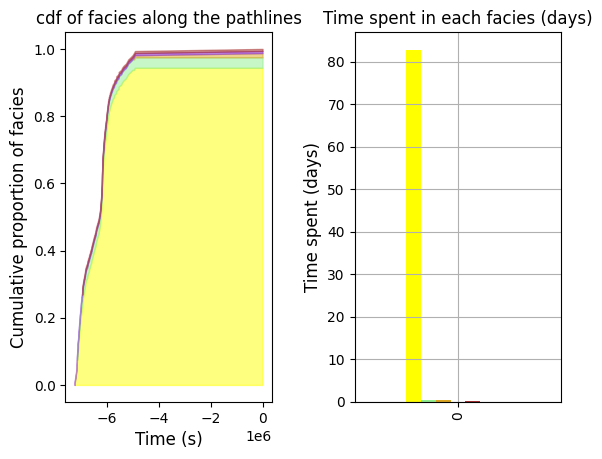

In [196]:
%matplotlib inline
# plot cumulative distribution of the facies along the pathlines vs the time
fig, ax = plt.subplots(1, 2)
plt.subplots_adjust(wspace=0.4)

curves = []

list_facies = [fa for fa in T1.get_all_facies()]
# orders facies by proportions
list_facies = sorted(list_facies, key=lambda x: -np.sum(facies_along_path == x.ID))
for fa in list_facies:
    curves.append(np.cumsum(facies_along_path == fa.ID) / len(facies_along_path))

prev_curve = np.zeros_like(curves[0], dtype=float)
for i, fa in enumerate(list_facies):
    curve = curves[i].astype(float) 
    curve[curve == 0] = np.nan
    ax[0].fill_between(-time_ordered, curve+prev_curve, prev_curve, alpha=0.5, color=fa.c)
    # ax[0].plot(-time_ordered, curve+prev_curve, label=fa.name, color=fa.c, marker="o", linewidth=0)
    prev_curve[~np.isnan(curve)] = curve[~np.isnan(curve)] + prev_curve[~np.isnan(curve)]

ax[0].set_xlabel("Time (s)", fontsize=12)
ax[0].set_ylabel("Cumulative proportion of facies", fontsize=12)
ax[0].set_title("cdf of facies along the pathlines")
# print time spent in each facies 

df_time = pd.DataFrame(columns=[fa.name for fa in list_facies])
# initialize the time spent in each facies
time_spent = np.zeros(len(list_facies))
for i, fa in enumerate(list_facies):
    time_spent[i] = np.sum(facies_along_path == fa.ID)
df_time.loc[0] = time_spent

for i in range(len(time_ordered)-1):
    dt = time_ordered[i] - time_ordered[i+1]
    for j, fa in enumerate(list_facies):
        if facies_along_path[i] == fa.ID:
            time_spent[j] += dt

df_time /= 86400  # convert seconds to days

color_facies = [fa.c for fa in list_facies]

df_time.plot(kind="bar", color=color_facies, legend=False, logy=False, ax=ax[1])
ax[1].set_title("Time spent in each facies (days)")
ax[1].set_ylabel("Time spent (days)", fontsize=12)
plt.grid()
plt.show()